In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/project2.csv'
df = pd.read_csv(file_path)

# Check the first few rows of the dataset
print(df.head())


   Event    Time  Cell_length      DNA1      DNA2    CD45RA     CD133  \
0      1  2693.0           22  4.391057  4.617262  0.162691 -0.029585   
1      2  3736.0           35  4.340481  4.816692  0.701349 -0.038280   
2      3  7015.0           32  3.838727  4.386369  0.603568 -0.032216   
3      4  7099.0           29  4.255806  4.830048  0.433747 -0.027611   
4      5  7700.0           25  3.976909  4.506433 -0.008809 -0.030297   

       CD19      CD22     CD11b  ...     CD117     CD49d    HLA-DR      CD64  \
0 -0.006696  0.066388 -0.009184  ...  0.053050  0.853505  1.664480 -0.005376   
1 -0.016654  0.074409  0.808031  ...  0.089660  0.197818  0.491592  0.144814   
2  0.073855 -0.042977 -0.001881  ...  0.046222  2.586670  1.308337 -0.010961   
3 -0.017661 -0.044072  0.733698  ...  0.066470  1.338669  0.140523 -0.013449   
4  0.080423  0.495791  1.107627  ... -0.006223  0.180924  0.197332  0.076167   

       CD41  Viability  file_number  event_number  label  individual  
0 -0.0019

In [ ]:
df.head()

Event    Time  Cell_length      DNA1      DNA2    CD45RA     CD133  \
0      1  2693.0           22  4.391057  4.617262  0.162691 -0.029585   
1      2  3736.0           35  4.340481  4.816692  0.701349 -0.038280   
2      3  7015.0           32  3.838727  4.386369  0.603568 -0.032216   
3      4  7099.0           29  4.255806  4.830048  0.433747 -0.027611   
4      5  7700.0           25  3.976909  4.506433 -0.008809 -0.030297   

       CD19      CD22     CD11b  ...     CD117     CD49d    HLA-DR      CD64  \
0 -0.006696  0.066388 -0.009184  ...  0.053050  0.853505  1.664480 -0.005376   
1 -0.016654  0.074409  0.808031  ...  0.089660  0.197818  0.491592  0.144814   
2  0.073855 -0.042977 -0.001881  ...  0.046222  2.586670  1.308337 -0.010961   
3 -0.017661 -0.044072  0.733698  ...  0.066470  1.338669  0.140523 -0.013449   
4  0.080423  0.495791  1.107627  ... -0.006223  0.180924  0.197332  0.076167   

       CD41  Viability  file_number  event_number  label  individual  
0 -0.001961   0.648429     3.627711           307    1.0           1  
1  0.868014   0.561384     3.627711           545    1.0           1  
2 -0.010413   0.643337     3.627711          1726    1.0           1  
3 -0.026039  -0.026523     3.627711          1766    1.0           1  
4 -0.040488   0.283287     3.627711          2031    1.0           1  

[5 rows x 42 columns]

In [ ]:
print("Basic Structure of the Data:")
display(df)

Basic Structure of the Data:


Event       Time  Cell_length      DNA1      DNA2    CD45RA  \
0            1    2693.00           22  4.391057  4.617262  0.162691   
1            2    3736.00           35  4.340481  4.816692  0.701349   
2            3    7015.00           32  3.838727  4.386369  0.603568   
3            4    7099.00           29  4.255806  4.830048  0.433747   
4            5    7700.00           25  3.976909  4.506433 -0.008809   
...        ...        ...          ...       ...       ...       ...   
265622  265623  707951.44           41  6.826629  7.133022  1.474081   
265623  265624  708145.44           45  6.787791  7.154026  0.116755   
265624  265625  708398.44           41  6.889866  7.141219  0.684921   
265625  265626  708585.44           39  6.865218  7.144353  0.288761   
265626  265627  709122.44           41  6.887820  7.127359  0.360753   

           CD133      CD19      CD22     CD11b  ...     CD117     CD49d  \
0      -0.029585 -0.006696  0.066388 -0.009184  ...  0.053050  0.853505   
1      -0.038280 -0.016654  0.074409  0.808031  ...  0.089660  0.197818   
2      -0.032216  0.073855 -0.042977 -0.001881  ...  0.046222  2.586670   
3      -0.027611 -0.017661 -0.044072  0.733698  ...  0.066470  1.338669   
4      -0.030297  0.080423  0.495791  1.107627  ... -0.006223  0.180924   
...          ...       ...       ...       ...  ...       ...       ...   
265622 -0.019174 -0.055620 -0.007261  0.063395  ... -0.011105  0.533736   
265623 -0.056213 -0.008864 -0.035158 -0.041845  ...  0.143869  1.269464   
265624 -0.006264 -0.026111 -0.030837 -0.034641  ...  0.087102 -0.055912   
265625 -0.011310 -0.048786  0.073983 -0.031787  ... -0.047971  0.101955   
265626  0.128604 -0.006934  0.109846  3.864711  ...  0.080195  0.037962   

          HLA-DR      CD64      CD41  Viability  file_number  event_number  \
0       1.664480 -0.005376 -0.001961   0.648429     3.627711           307   
1       0.491592  0.144814  0.868014   0.561384     3.627711           545   
2       1.308337 -0.010961 -0.010413   0.643337     3.627711          1726   
3       0.140523 -0.013449 -0.026039  -0.026523     3.627711          1766   
4       0.197332  0.076167 -0.040488   0.283287     3.627711          2031   
...          ...       ...       ...        ...          ...           ...   
265622  0.123758 -0.042495 -0.027971   0.236957     3.669327        102686   
265623  0.047215 -0.008000 -0.025811  -0.003500     3.669327        102690   
265624  0.501536  0.053884 -0.042602   0.107206     3.669327        102701   
265625  6.200001  0.296877  0.192786   0.620872     3.669327        102706   
265626  3.675123 -0.000878 -0.052526   0.310466     3.669327        102720   

        label  individual  
0         1.0           1  
1         1.0           1  
2         1.0           1  
3         1.0           1  
4         1.0           1  
...       ...         ...  
265622    NaN           2  
265623    NaN           2  
265624    NaN           2  
265625    NaN           2  
265626    NaN           2  

[265627 rows x 42 columns]

In [ ]:
print("\nData Information:")
display(df.info())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265627 entries, 0 to 265626
Data columns (total 42 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Event         265627 non-null  int64  
 1   Time          265627 non-null  float64
 2   Cell_length   265627 non-null  int64  
 3   DNA1          265627 non-null  float64
 4   DNA2          265627 non-null  float64
 5   CD45RA        265627 non-null  float64
 6   CD133         265627 non-null  float64
 7   CD19          265627 non-null  float64
 8   CD22          265627 non-null  float64
 9   CD11b         265627 non-null  float64
 10  CD4           265627 non-null  float64
 11  CD8           265627 non-null  float64
 12  CD34          265627 non-null  float64
 13  Flt3          265627 non-null  float64
 14  CD20          265627 non-null  float64
 15  CXCR4         265627 non-null  float64
 16  CD235ab       265627 non-null  float64
 17  CD45          265627 non-null

None

In [ ]:

print("\nMissing Values:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
display(missing_df[missing_df['Missing Values'] > 0])


Missing Values:


Missing Values  Percentage
label          161443   60.778084

In [ ]:
print("\nDescriptive Statistics:")
display(df.describe())


Descriptive Statistics:


Event           Time    Cell_length           DNA1  \
count  265627.000000  265627.000000  265627.000000  265627.000000   
mean   132814.000000  272948.345014      34.450572       4.606956   
std     76680.054314  171220.139430      11.446694       1.312831   
min         1.000000       1.000000      10.000000       2.786488   
25%     66407.500000  120196.000000      26.000000       3.700023   
50%    132814.000000  253276.000000      33.000000       4.022127   
75%    199220.500000  424502.500000      41.000000       6.353313   
max    265627.000000  709122.440000      65.000000       7.001489   

                DNA2         CD45RA          CD133           CD19  \
count  265627.000000  265627.000000  265627.000000  265627.000000   
mean        5.198308       0.688127       0.145960       0.509301   
std         1.150357       0.609105       0.259267       0.857462   
min         2.236450      -0.057305      -0.058081      -0.058089   
25%         4.407822       0.204625      -0.022935      -0.018838   
50%         4.698415       0.549387       0.025353       0.075210   
75%         6.766268       1.031198       0.224299       0.548386   
max         7.472308       6.691197       5.527494       4.990085   

                CD22          CD11b  ...          CD117          CD49d  \
count  265627.000000  265627.000000  ...  265627.000000  265627.000000   
mean        0.397323       0.710319  ...       0.131199       0.794938   
std         0.762126       1.011434  ...       0.313208       0.627619   
min        -0.057342      -0.058236  ...      -0.057668      -0.058064   
25%        -0.020689      -0.000294  ...      -0.023957       0.283013   
50%         0.058790       0.257923  ...      -0.000410       0.677212   
75%         0.386481       0.923517  ...       0.154736       1.190787   
max         5.160477       5.260789  ...       5.502125       5.153438   

              HLA-DR           CD64           CD41      Viability  \
count  265627.000000  265627.000000  265627.000000  265627.000000   
mean        1.521812       0.551512       0.261754       0.570037   
std         1.694211       0.888739       0.617065       0.589738   
min        -0.057974      -0.058199      -0.058244      -0.057979   
25%         0.057709      -0.010582      -0.020166       0.065523   
50%         0.611335       0.122493       0.052229       0.398230   
75%         2.888240       0.604131       0.305591       0.931058   
max         7.052507       4.517843       7.718288       2.433031   

         file_number   event_number          label     individual  
count  265627.000000  265627.000000  104184.000000  265627.000000  
mean        3.639348  171288.314234       8.116102       1.279625  
std         0.018678  123904.361456       2.457486       0.448816  
min         3.627711       1.000000       1.000000       1.000000  
25%         3.627711   58679.500000       7.000000       1.000000  
50%         3.627711  152783.000000       8.000000       1.000000  
75%         3.669327  282369.000000      10.000000       2.000000  
max         3.669327  400112.000000      14.000000       2.000000  

[8 rows x 42 columns]

##NULL VS NOT NULL

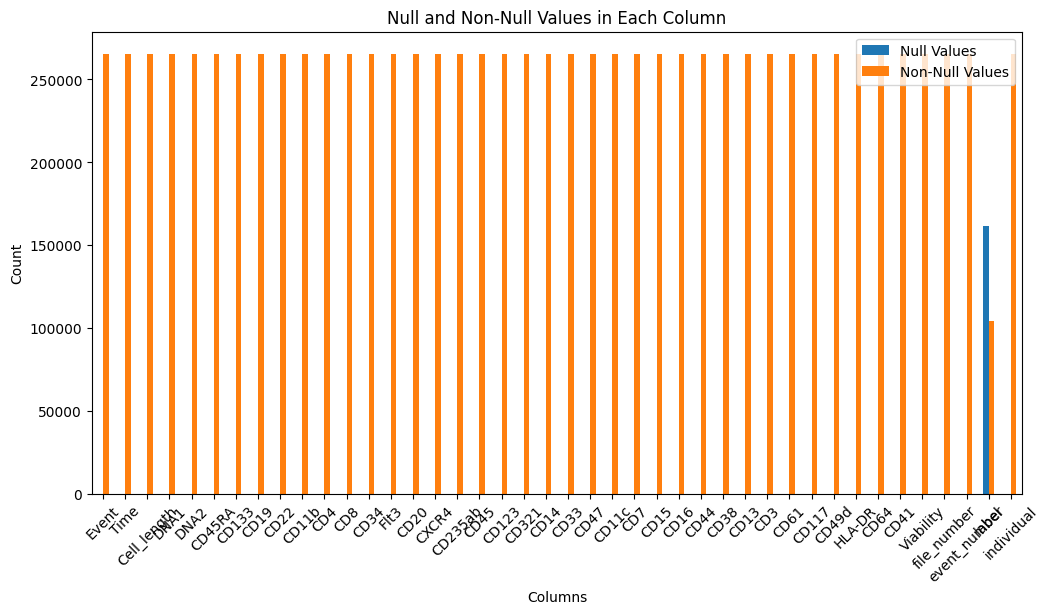

In [ ]:
df = pd.DataFrame(df)
null_values = df.isnull().sum()
non_null_values = df.notnull().sum()
plot_data = pd.DataFrame({
    'Null Values': null_values,
    'Non-Null Values': non_null_values
})
plot_data.plot(kind='bar', figsize=(12, 6))
plt.title('Null and Non-Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

In [ ]:
df = df.drop(columns=['Event','Time','individual','file_number','event_number',])

##CLASS LABEL DISTRIBUTION

Class Label Distribution:
label
NaN     161443
7.0      26366
10.0     21099
8.0      20108
9.0      16520
13.0      6135
2.0       3905
4.0       3295
3.0       2248
11.0      1238
1.0       1207
6.0        916
14.0       513
12.0       330
5.0        304
Name: count, dtype: int64


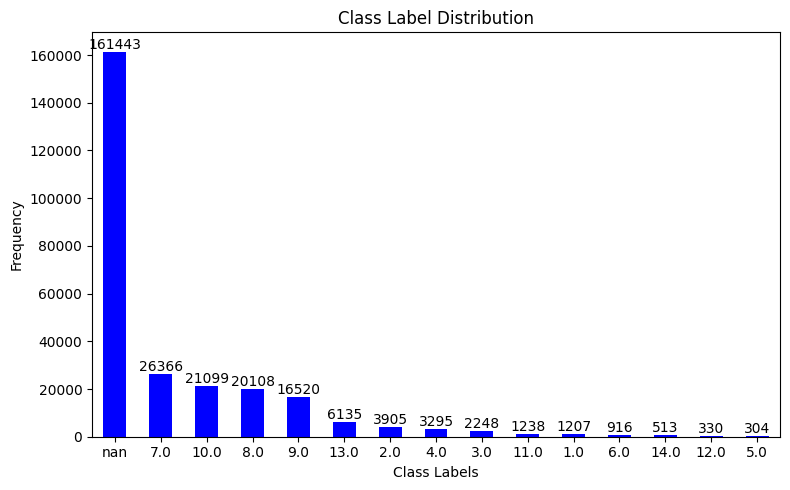

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = df


label_distribution = df['label'].value_counts(dropna=False)
print("Class Label Distribution:")
print(label_distribution)


label_distribution = df['label'].value_counts(dropna=False)

plt.figure(figsize=(8, 5))
bars = label_distribution.plot(kind='bar', color='blue')
plt.title('Class Label Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

for bar in bars.patches:
    bars.annotate(bar.get_height(),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center',
                  va='bottom')

plt.tight_layout()
plt.show()


##Histograms of Features

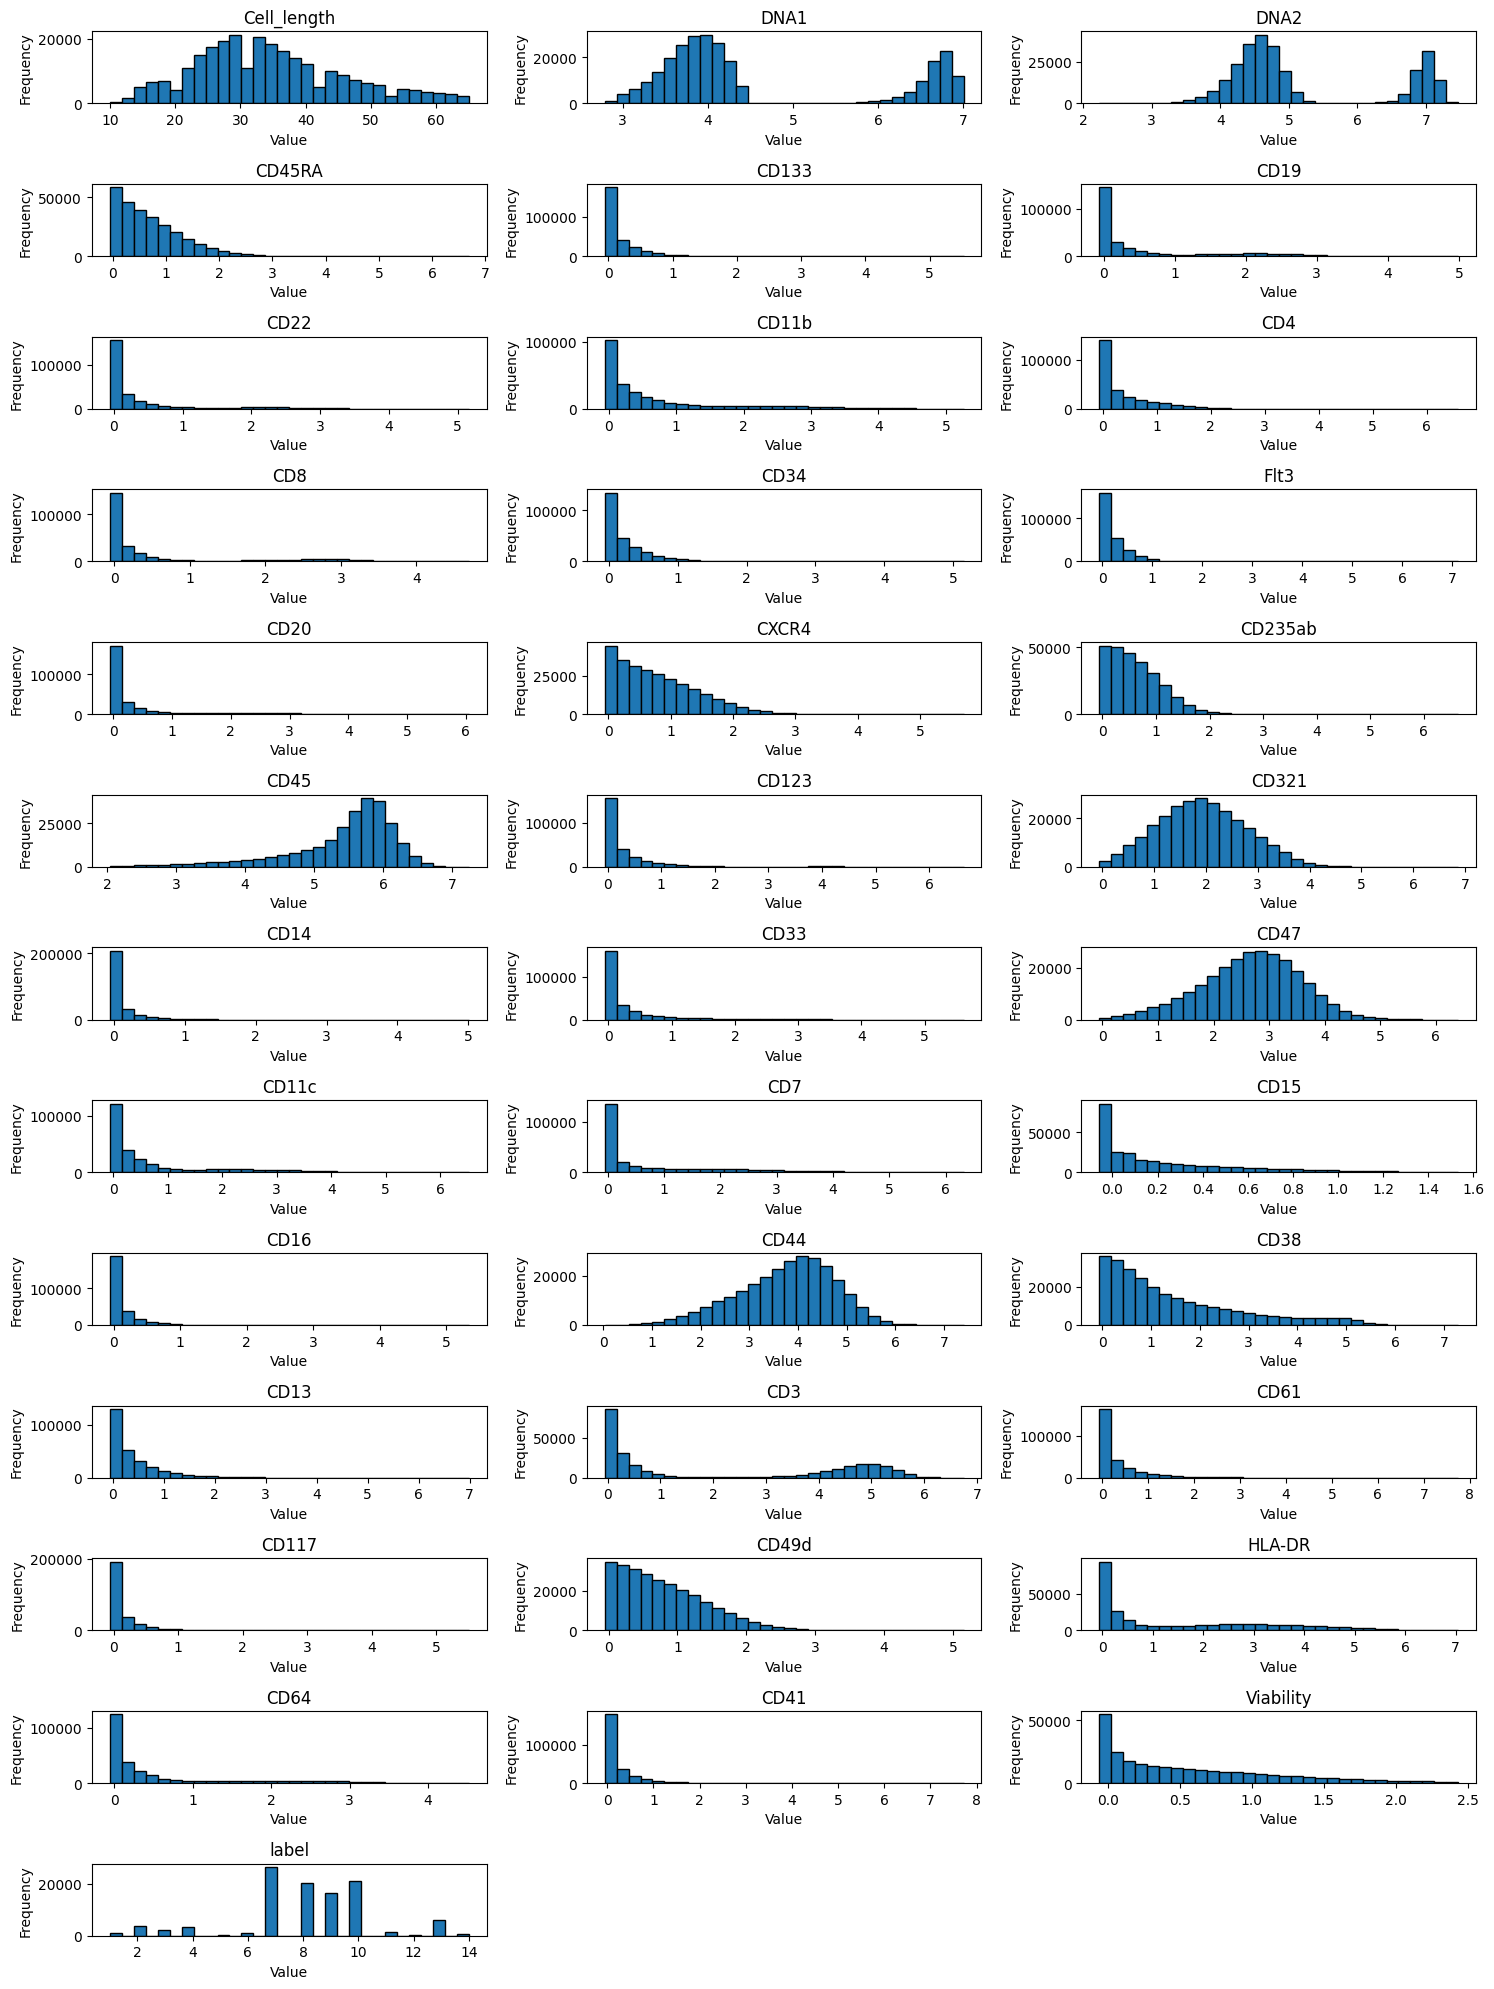

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Select only numerical columns for histogram plotting
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Set up the figure for subplots
plt.figure(figsize=(15, 20))

# Iterate through numerical columns and create a histogram for each
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns)//3 + 1, 3, i)
    plt.hist(data[column], bins=30, edgecolor='black')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


##Comparing Feature Distributions with Histograms and KDE Plots

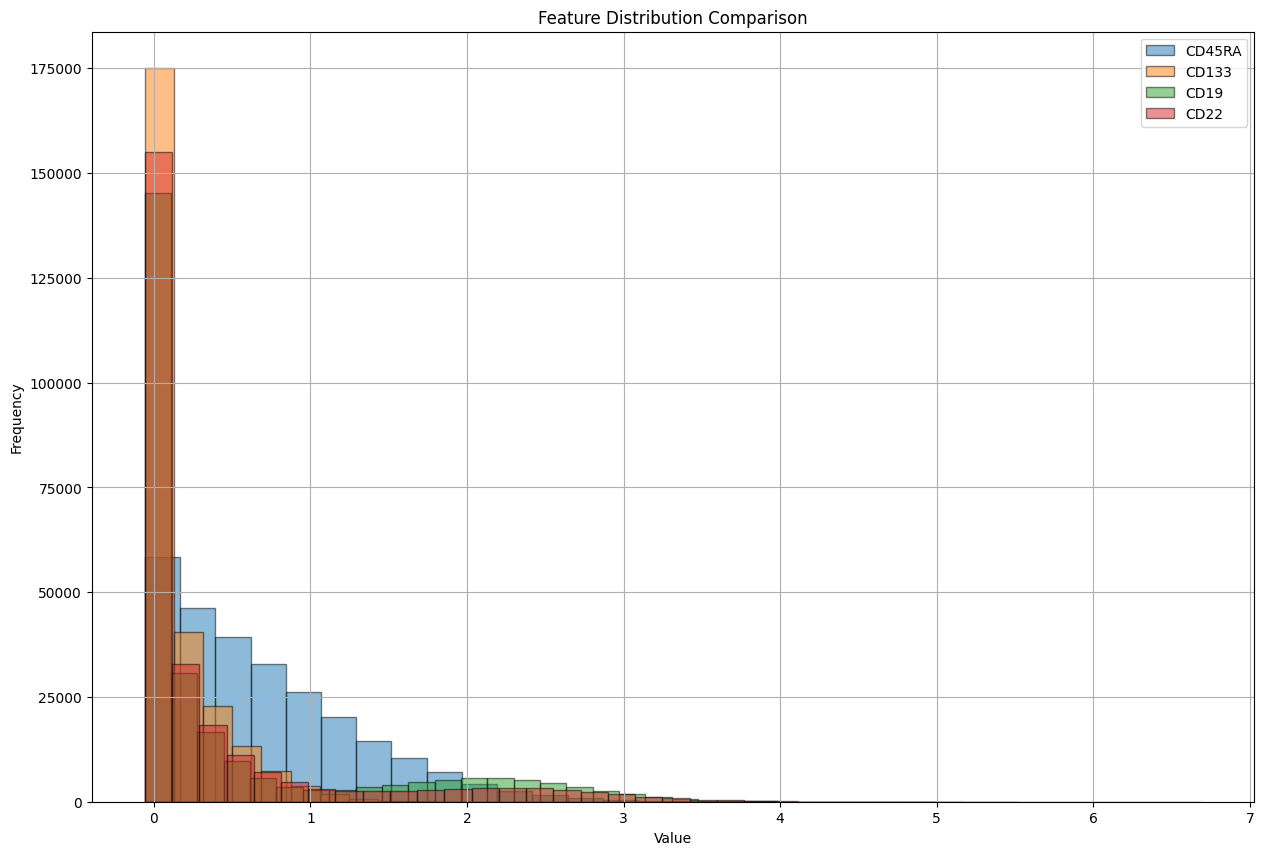

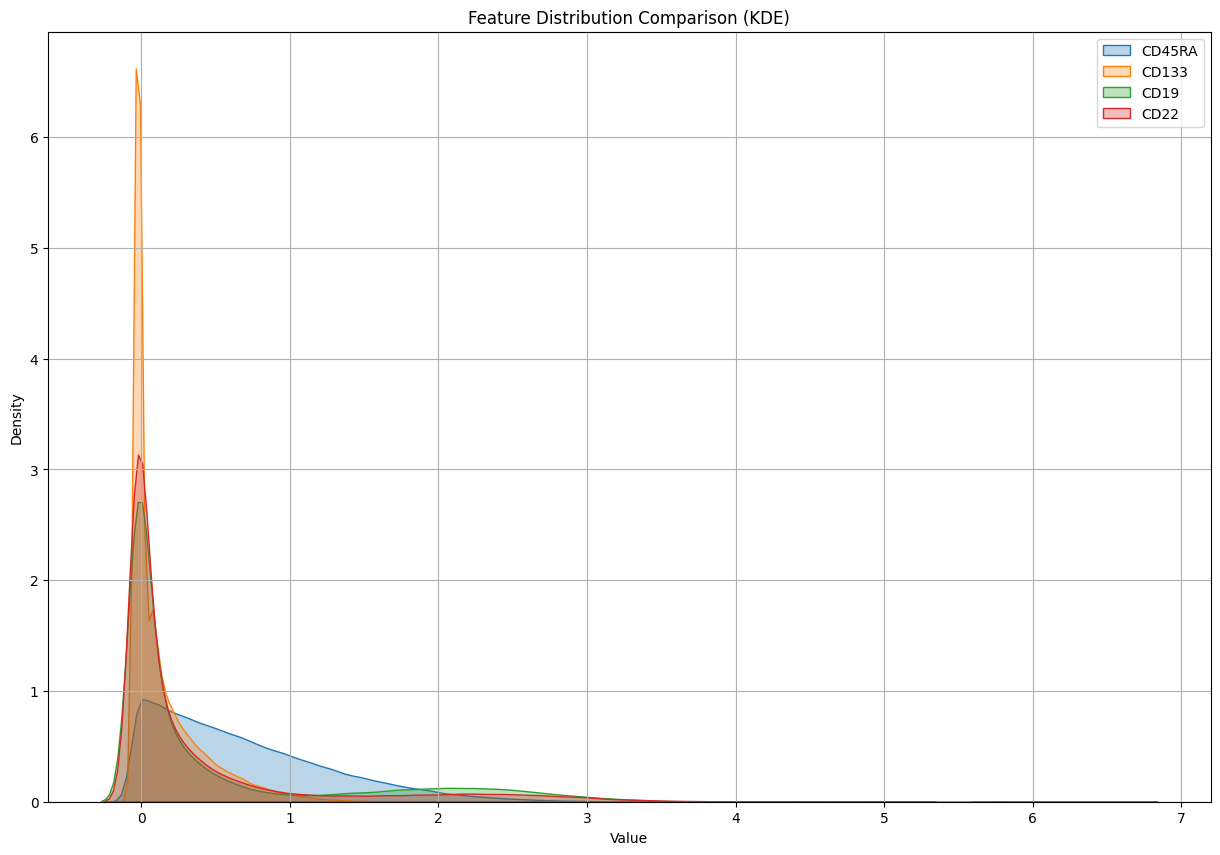

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Select features for comparison (adjust based on your dataset)
features_to_compare = ['CD45RA', 'CD133', 'CD19', 'CD22']  # Example features, replace with your own
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Custom color palette

# Step 1: Histograms for feature distribution comparison
plt.figure(figsize=(15, 10))

for feature, color in zip(features_to_compare, colors):
    plt.hist(data[feature], bins=30, alpha=0.5, label=feature, edgecolor='black', color=color)

plt.title('Feature Distribution Comparison')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Step 2: Kernel Density Estimation (KDE) for smoother distribution comparison
plt.figure(figsize=(15, 10))

for feature, color in zip(features_to_compare, colors):
    sns.kdeplot(data[feature], label=feature, fill=True, alpha=0.3, color=color)

plt.title('Feature Distribution Comparison (KDE)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


##Box Plot Analysis of Feature Distributions

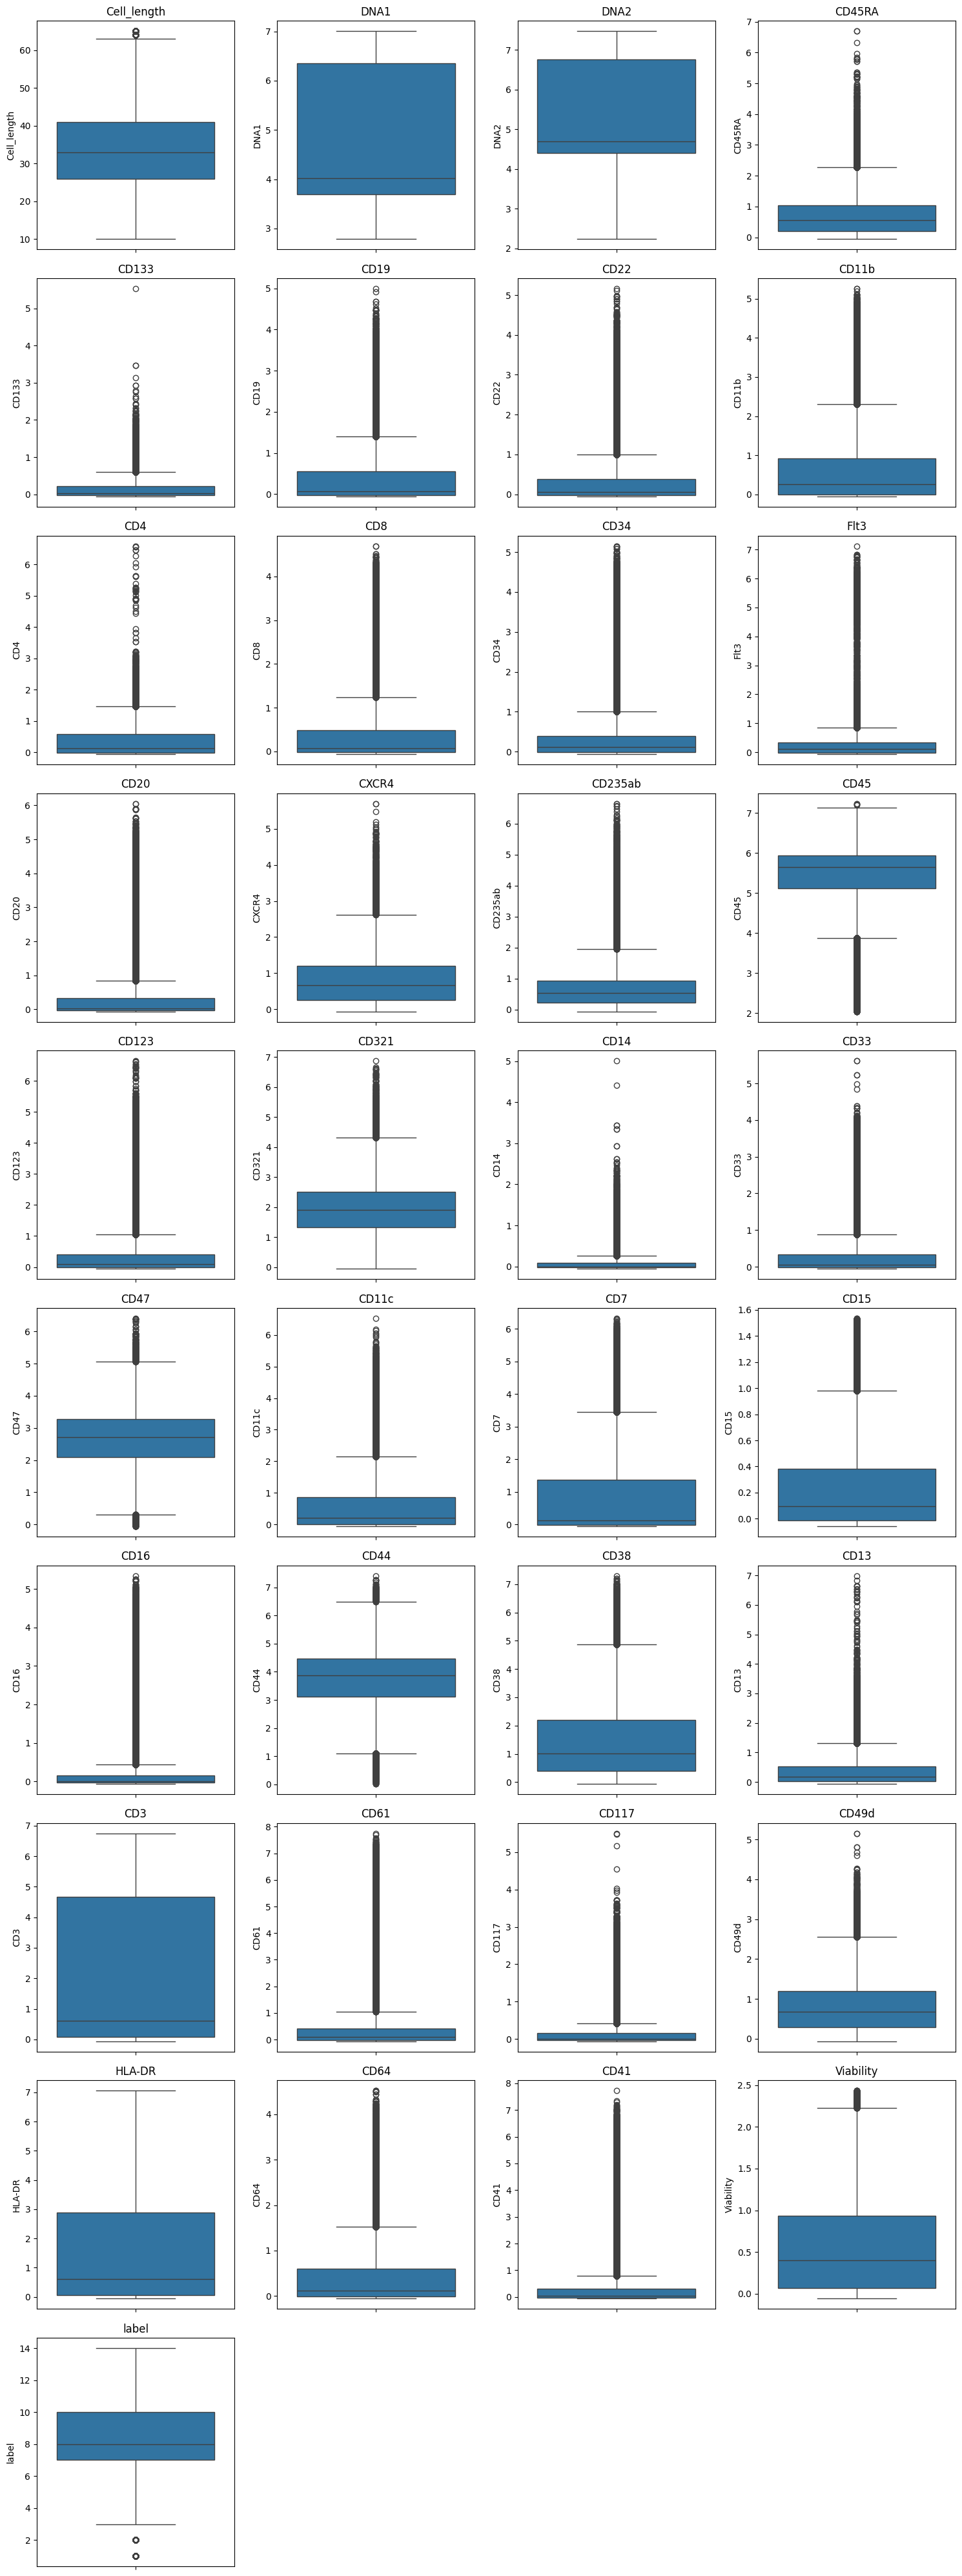

<Figure size 1500x1000 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Step 1: Box Plots for Numerical Features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns  # Select numerical columns
rows = (len(numerical_features) // 4) + 1  # Calculate the number of rows needed

plt.figure(figsize=(15, rows * 4))
for i, feature in enumerate(numerical_features):
    plt.subplot(rows, 4, i + 1)
    sns.boxplot(data[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

# Step 2: Count Plots for Categorical Features
categorical_features = data.select_dtypes(include=['object']).columns  # Select categorical columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=data[feature], order=data[feature].value_counts().index)
    plt.title(feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##Feature Correlation Matrix Analysis

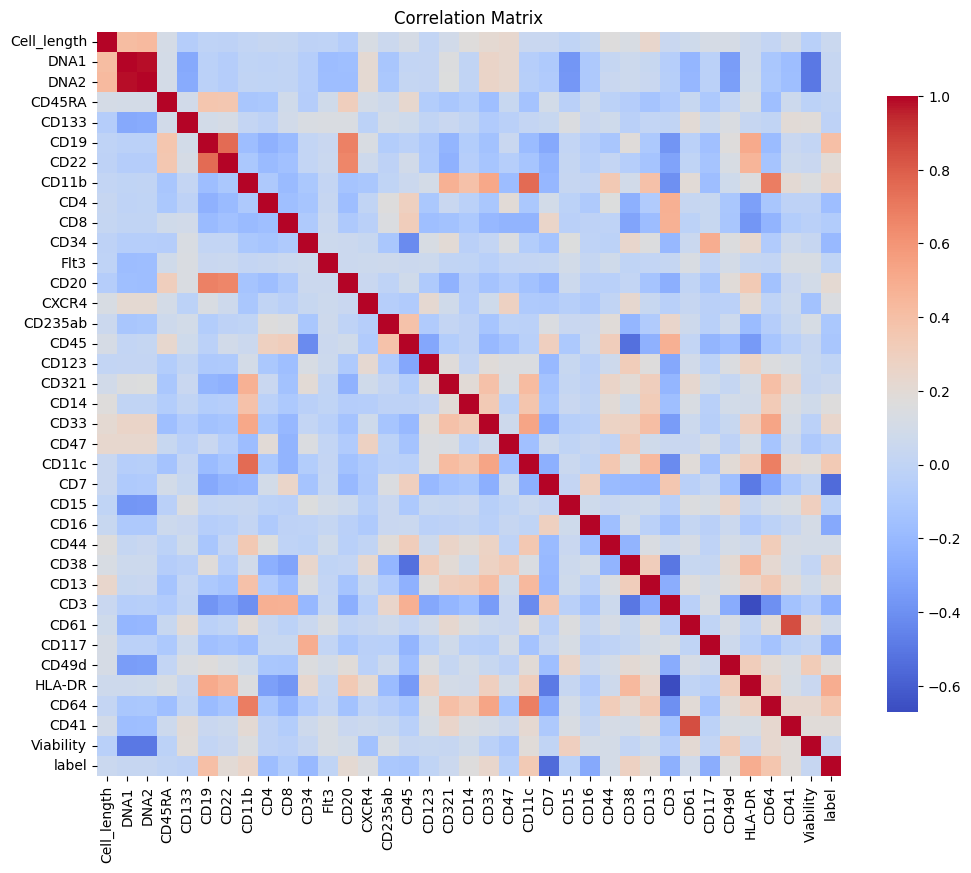

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Drop the specified columns
for col in ['file_number', 'Event', 'Time']:
    if col in data.columns:
        data = data.drop(columns=[col])

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using Seaborn without annotations
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix')
plt.show()



##Analysis of Feature Skewness

             Skewness                   Category
Cell_length  0.527832               Right-skewed
DNA1         0.845010               Right-skewed
DNA2         0.779167               Right-skewed
CD45RA       1.191595               Right-skewed
CD133        2.141953               Right-skewed
CD19         1.682609               Right-skewed
CD22         2.283181               Right-skewed
CD11b        1.679089               Right-skewed
CD4          1.622044               Right-skewed
CD8          1.775713               Right-skewed
CD34         3.492437               Right-skewed
Flt3         7.098151               Right-skewed
CD20         2.754699               Right-skewed
CXCR4        0.955342               Right-skewed
CD235ab      2.001479               Right-skewed
CD45        -1.484824                Left-skewed
CD123        3.648890               Right-skewed
CD321        0.247097  Approximately symmetrical
CD14         3.609006               Right-skewed
CD33         2.72497

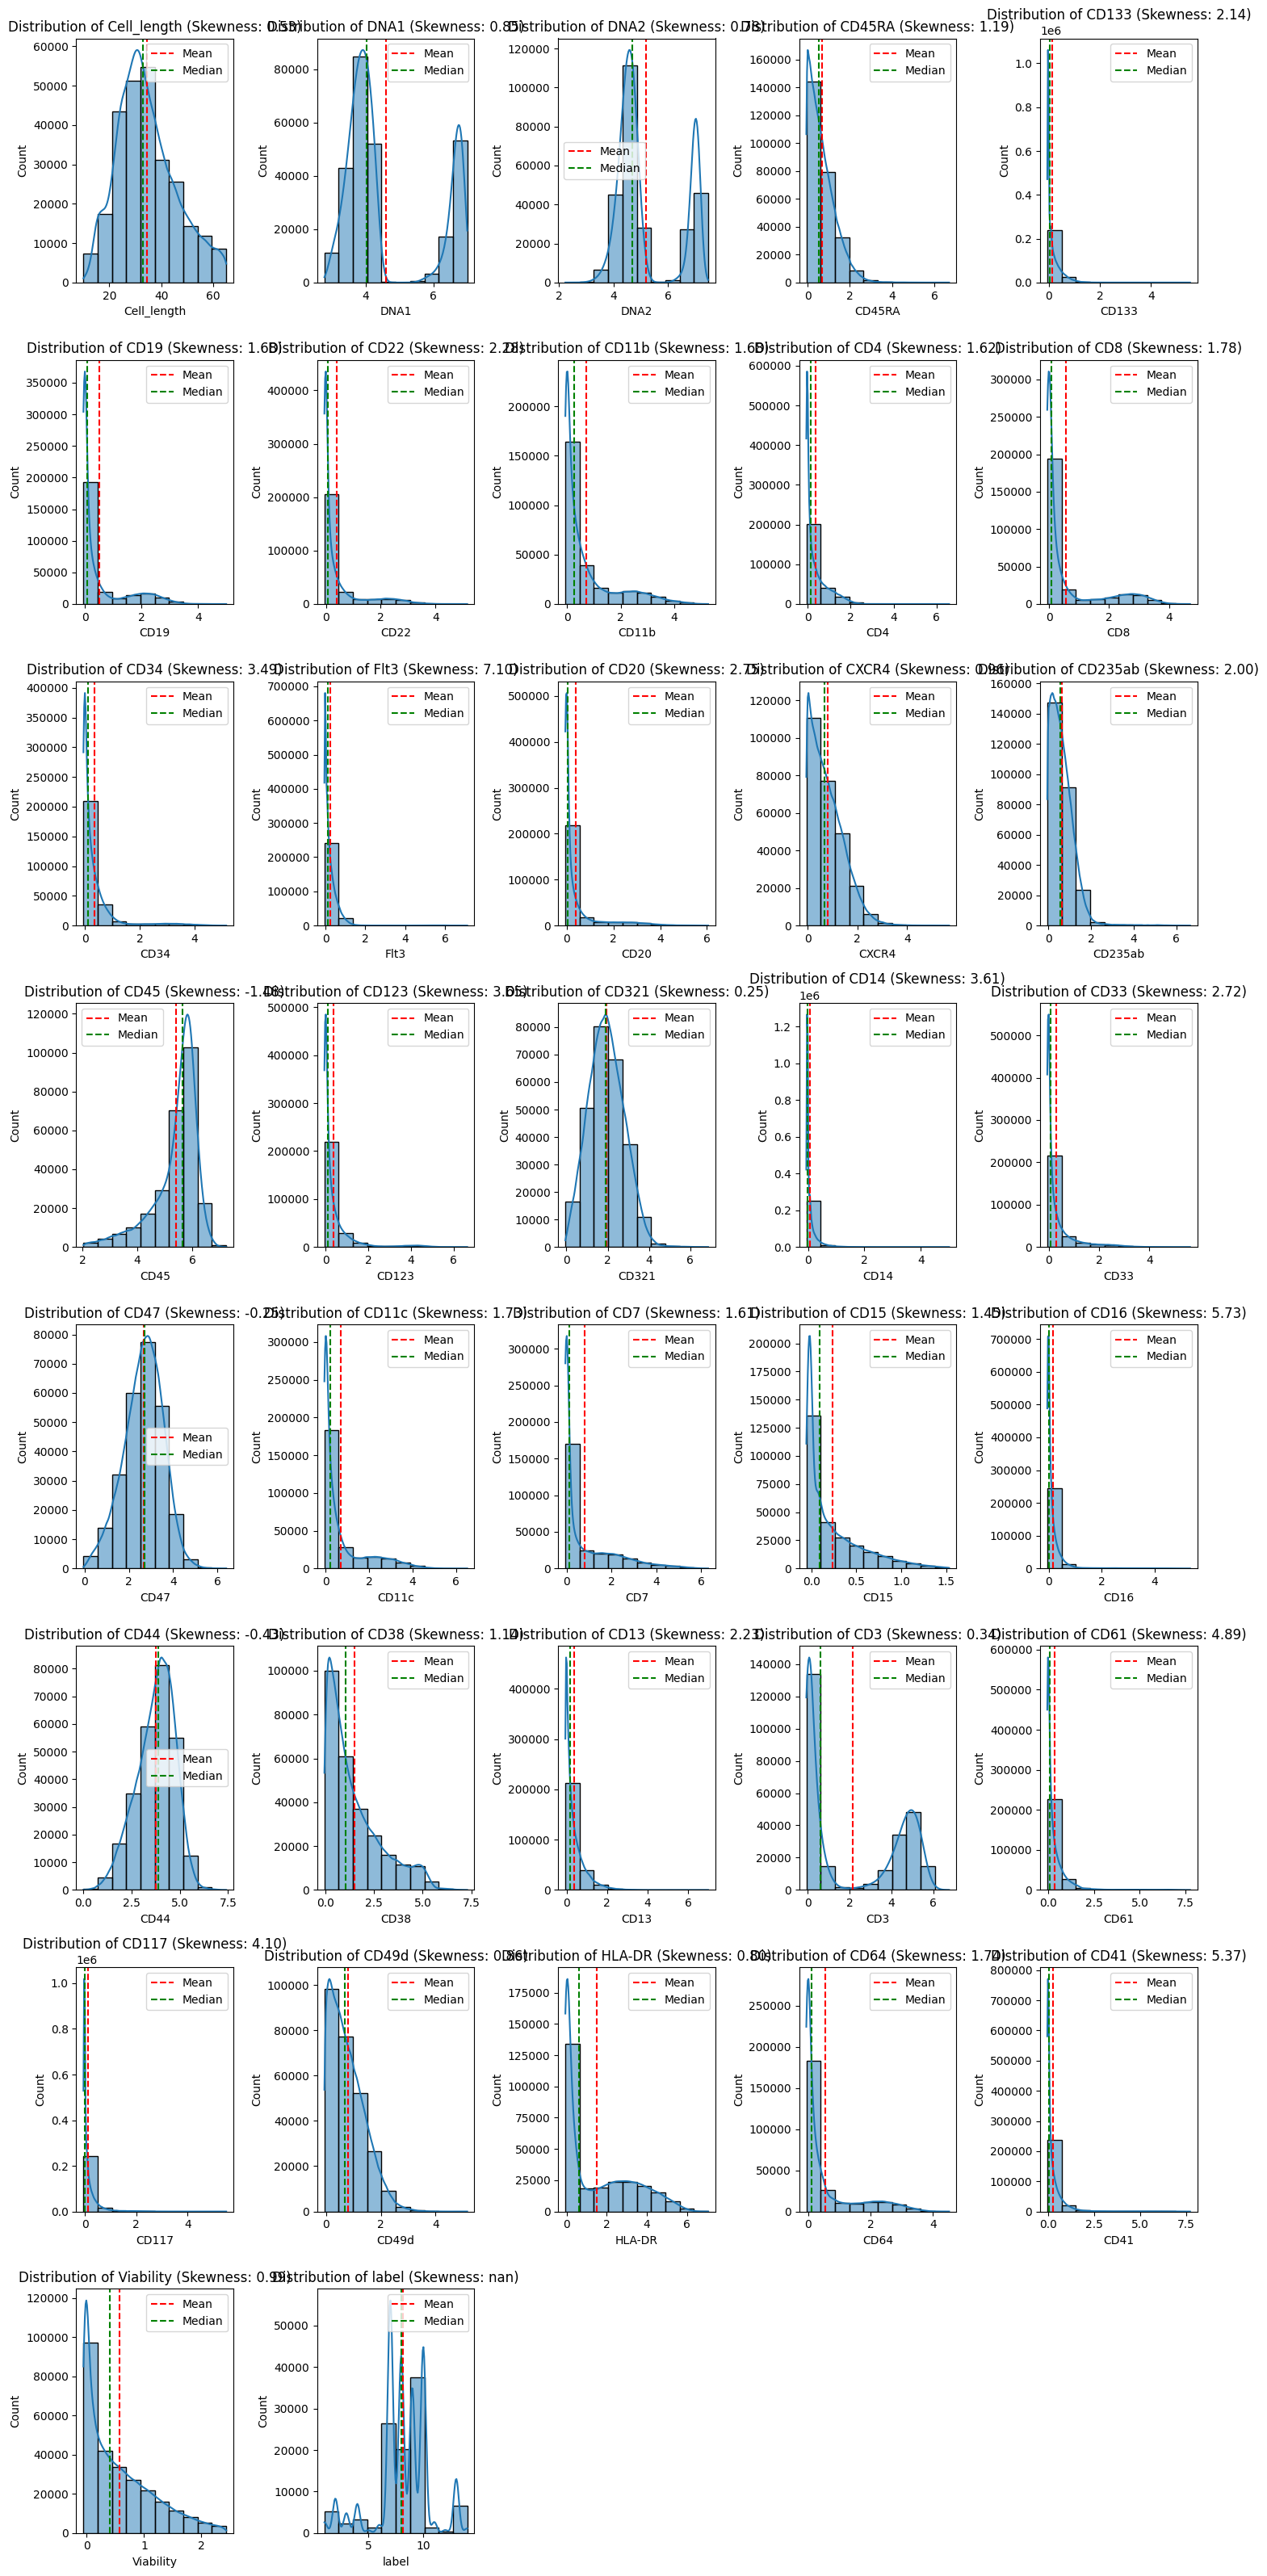

In [ ]:
import pandas as pd
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import math


for col in ['file_number', 'Event', 'Time']:
    if col in data.columns:
        data = data.drop(columns=[col])

# Calculate skewness
skewness = data.apply(skew)

# Function to categorize skewness
def categorize_skewness(value):
    if value > 0.5:
        return 'Right-skewed'
    elif value < -0.5:
        return 'Left-skewed'
    else:
        return 'Approximately symmetrical'

# Apply the categorization
skewness_category = skewness.apply(categorize_skewness)

# Display skewness and its categorization
skewness_df = pd.DataFrame({'Skewness': skewness, 'Category': skewness_category})
print(skewness_df)

# Set the number of columns in the grid
n_cols = 5  # Adjust this value for number of plots per row
n_plots = len(data.columns)
n_rows = math.ceil(n_plots / n_cols)

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))  # Adjust figsize for larger or smaller plots
axes = axes.flatten()  # Flatten axes array to make it easier to index

# Loop through columns and plot histograms on each subplot
for idx, col in enumerate(data.columns):
    sns.histplot(data[col], bins=10, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col} (Skewness: {skewness[col]:.2f})')
    axes[idx].axvline(data[col].mean(), color='red', linestyle='--', label='Mean')
    axes[idx].axvline(data[col].median(), color='green', linestyle='--', label='Median')
    axes[idx].legend()

# Remove any unused subplots (if n_plots is not a perfect multiple of n_cols)
for i in range(n_plots, len(axes)):
    fig.delaxes(axes[i])

# Ensure the layout is tight and the plot is shown properly
plt.tight_layout()
plt.show(block=True)  # Ensure plt.show() does not block rendering


##Analysis of Feature Kurtosis

                  Column   Kurtosis                   Category
Cell_length  Cell_length   2.834033  Platykurtic (light tails)
DNA1                DNA1   1.994037  Platykurtic (light tails)
DNA2                DNA2   1.975021  Platykurtic (light tails)
CD45RA            CD45RA   4.964272  Leptokurtic (heavy tails)
CD133              CD133   9.190066  Leptokurtic (heavy tails)
CD19                CD19   4.590887  Leptokurtic (heavy tails)
CD22                CD22   7.500223  Leptokurtic (heavy tails)
CD11b              CD11b   4.964495  Leptokurtic (heavy tails)
CD4                  CD4   5.844261  Leptokurtic (heavy tails)
CD8                  CD8   4.745776  Leptokurtic (heavy tails)
CD34                CD34  16.596416  Leptokurtic (heavy tails)
Flt3                Flt3  85.583534  Leptokurtic (heavy tails)
CD20                CD20  10.435449  Leptokurtic (heavy tails)
CXCR4              CXCR4   3.936307  Leptokurtic (heavy tails)
CD235ab          CD235ab  13.440586  Leptokurtic (heavy

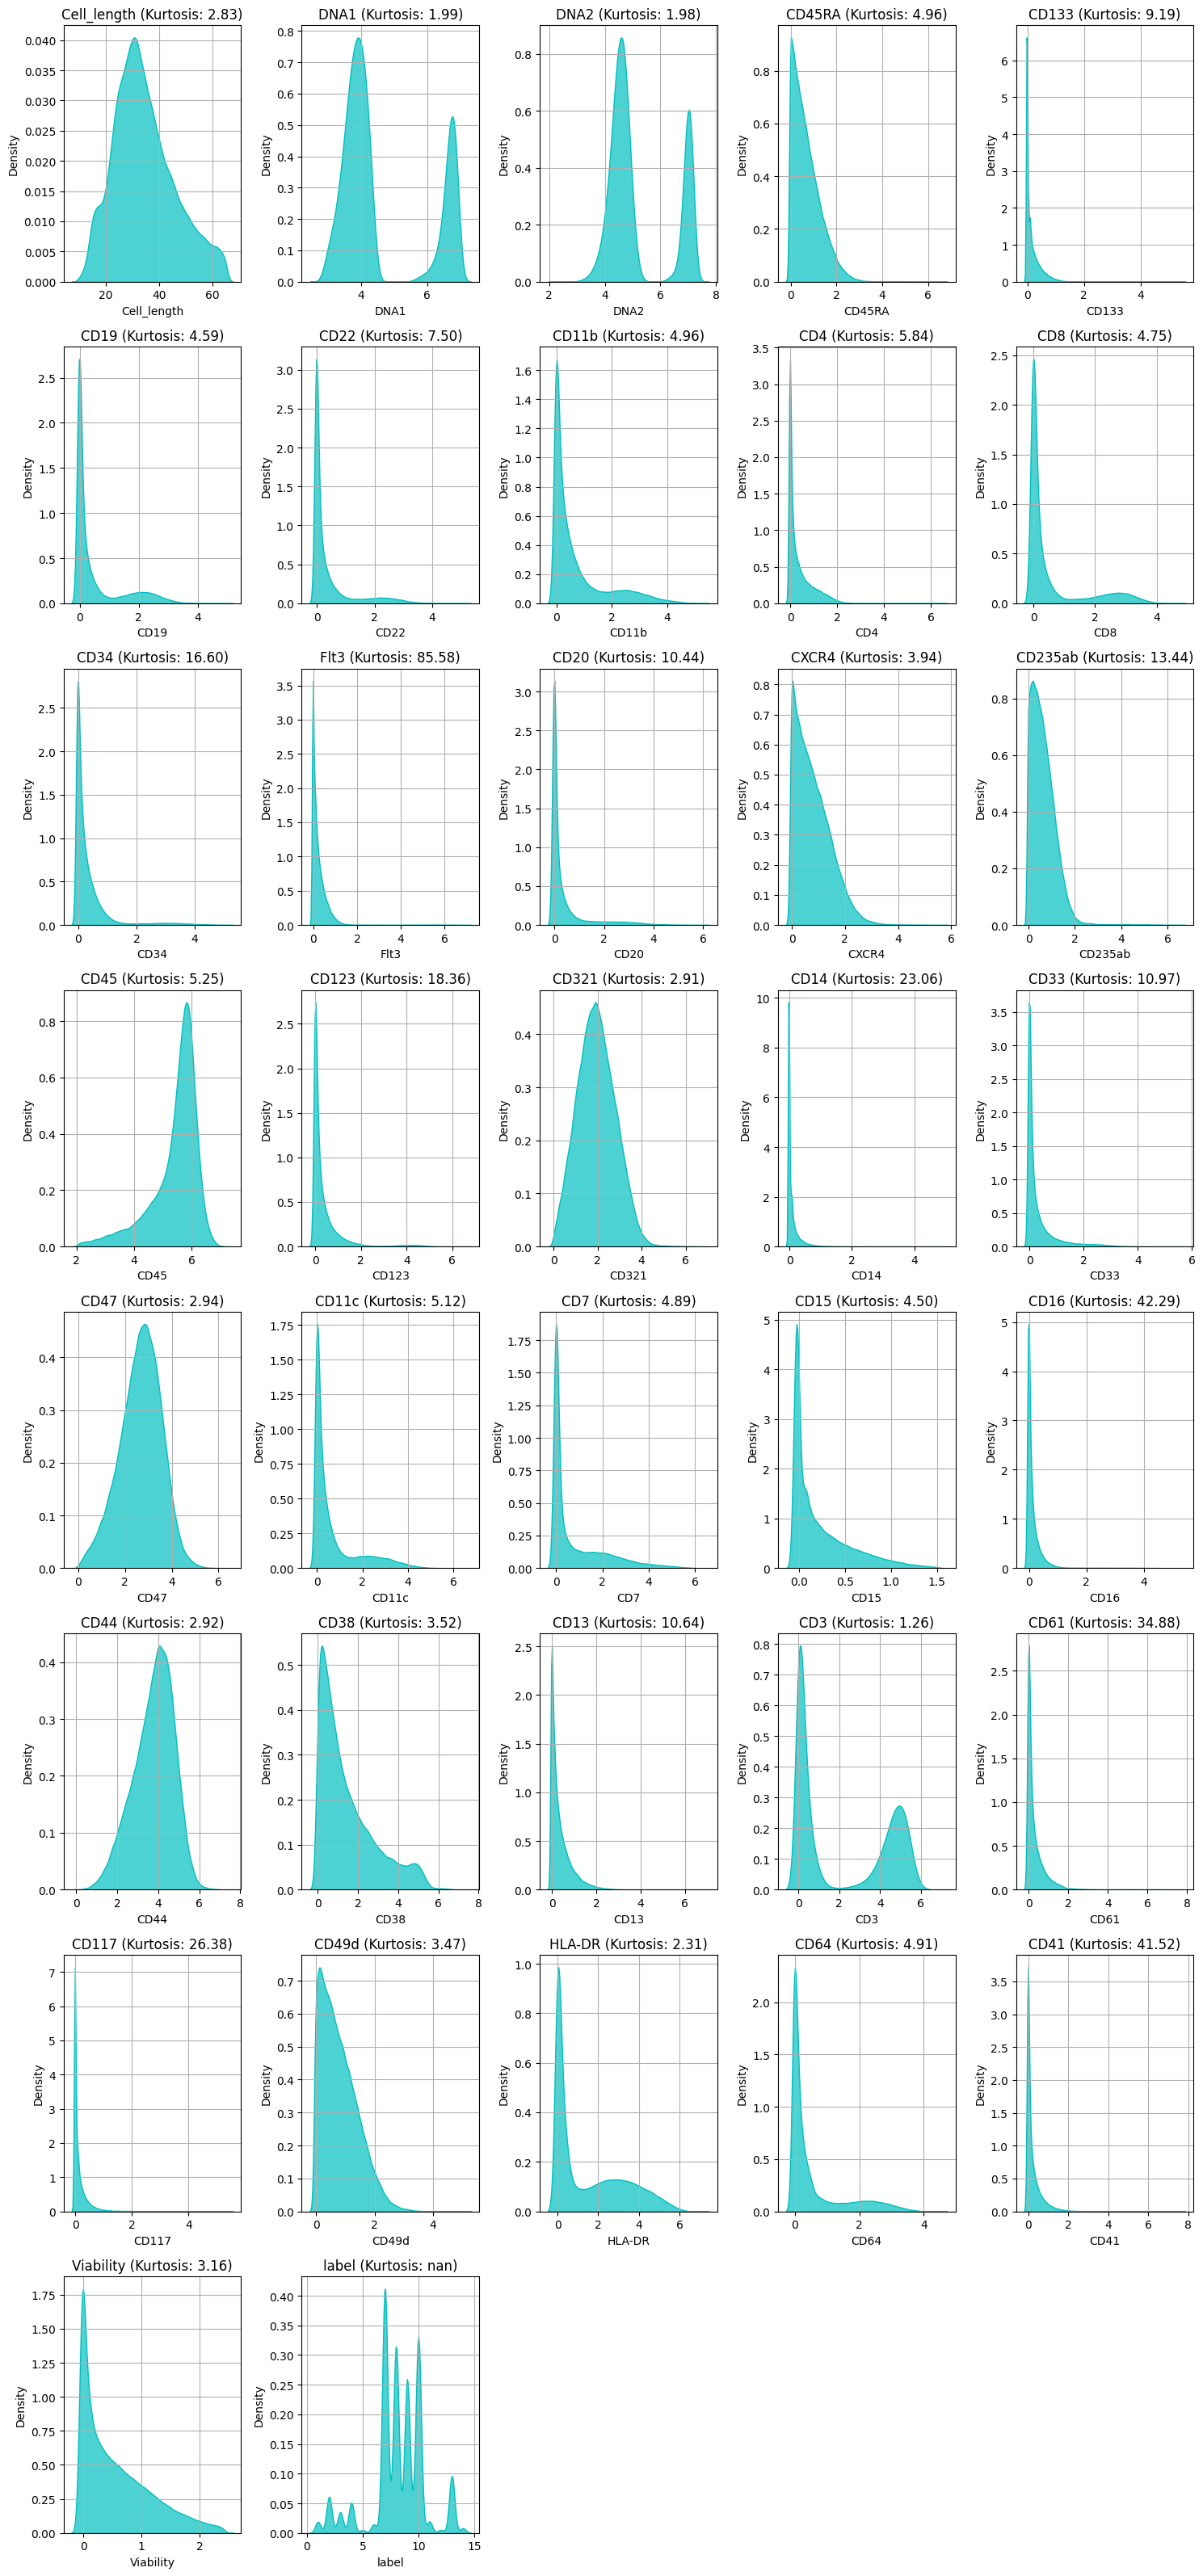

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
import math



# Drop the specified columns

for col in ['file_number', 'Event', 'Time']:
    if col in data.columns:
        data = data.drop(columns=[col])
# Calculate kurtosis for each column
kurtosis_values = data.apply(kurtosis, fisher=False)  # Fisher=False gives Pearson kurtosis (normal kurtosis = 3)

# Create a DataFrame with kurtosis values
kurtosis_df = pd.DataFrame({'Column': data.columns, 'Kurtosis': kurtosis_values})

# Categorize the kurtosis values (Leptokurtic, Mesokurtic, Platykurtic)
def categorize_kurtosis(value):
    if value > 3:
        return 'Leptokurtic (heavy tails)'
    elif value < 3:
        return 'Platykurtic (light tails)'
    else:
        return 'Mesokurtic (normal tails)'

kurtosis_df['Category'] = kurtosis_df['Kurtosis'].apply(categorize_kurtosis)

# Print the kurtosis values and their categories
print(kurtosis_df)

# Set the number of columns in the grid
n_cols = 5  # You can adjust this to control how many plots per row
n_plots = len(data.columns)
n_rows = math.ceil(n_plots / n_cols)

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))  # Adjust figsize for larger or smaller plots
axes = axes.flatten()  # Flatten axes array to make it easier to index

# Loop through columns and plot KDE on each subplot
for idx, column in enumerate(data.columns):
    sns.kdeplot(data[column].dropna(), color='c', fill=True, alpha=0.7, ax=axes[idx])
    axes[idx].set_title(f'{column} (Kurtosis: {kurtosis_df.loc[kurtosis_df["Column"] == column, "Kurtosis"].values[0]:.2f})')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Density')
    axes[idx].grid(True)

# Remove any unused subplots (if n_plots is not a perfect multiple of n_cols)
for i in range(n_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


##T-SNE Visualization


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


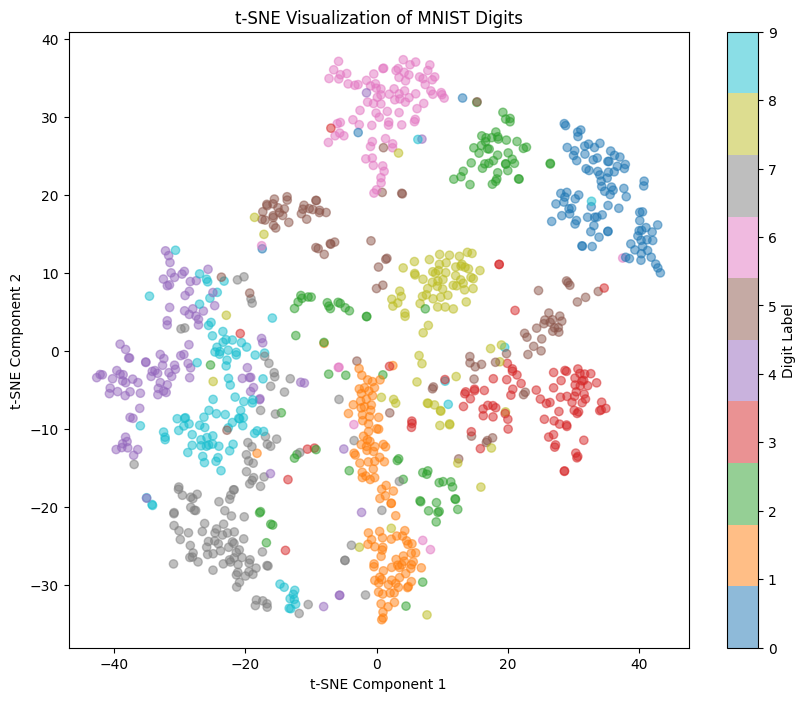

In [ ]:
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Flatten the images and take a subset
n_samples = 1000
train_images_flat = train_images[:n_samples].reshape(n_samples, -1)
train_labels_subset = train_labels[:n_samples]

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
train_images_embedded = tsne.fit_transform(train_images_flat)

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_images_embedded[:, 0], train_images_embedded[:, 1], c=train_labels_subset, cmap='tab10', alpha=0.5)
plt.colorbar(scatter, label='Digit Label')
plt.title('t-SNE Visualization of MNIST Digits')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


##t-SNE Visualization for Dimensionality Reduction


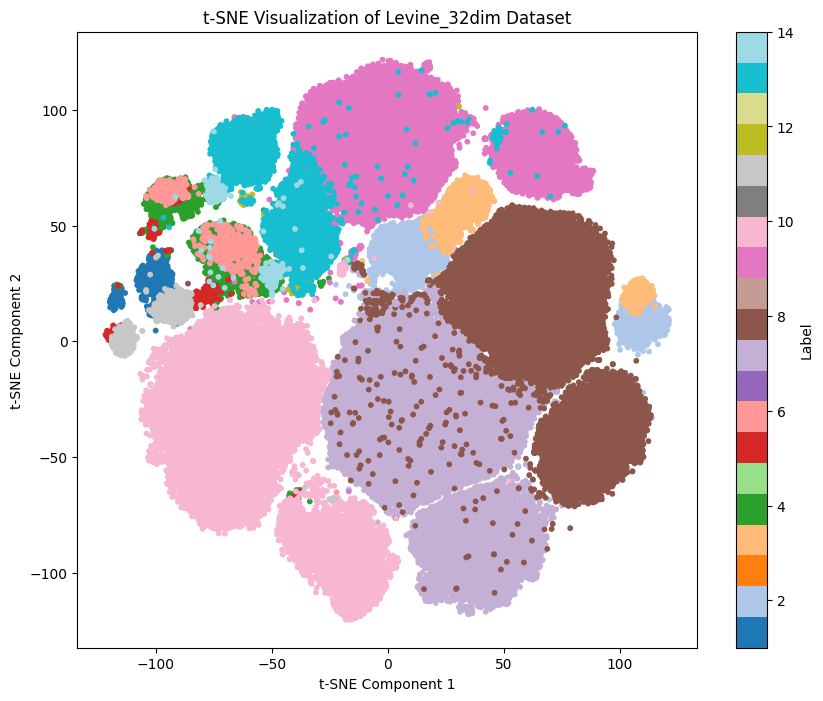

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



# Exclude the specified columns
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']
data_filtered = data.drop(columns=exclude_columns)

# Standardize the data (z-score normalization)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_filtered)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)  # You can adjust perplexity as needed
tsne_results = tsne.fit_transform(data_standardized)

# Add the t-SNE results to the original data for visualization
data['t-SNE Component 1'] = tsne_results[:, 0]
data['t-SNE Component 2'] = tsne_results[:, 1]

# Plot the t-SNE visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data['t-SNE Component 1'], data['t-SNE Component 2'], c=data['label'], cmap='tab20', s=10)
plt.colorbar(scatter, label='Label')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


##Principal Component Analysis (PCA) for Dimensionality Reduction

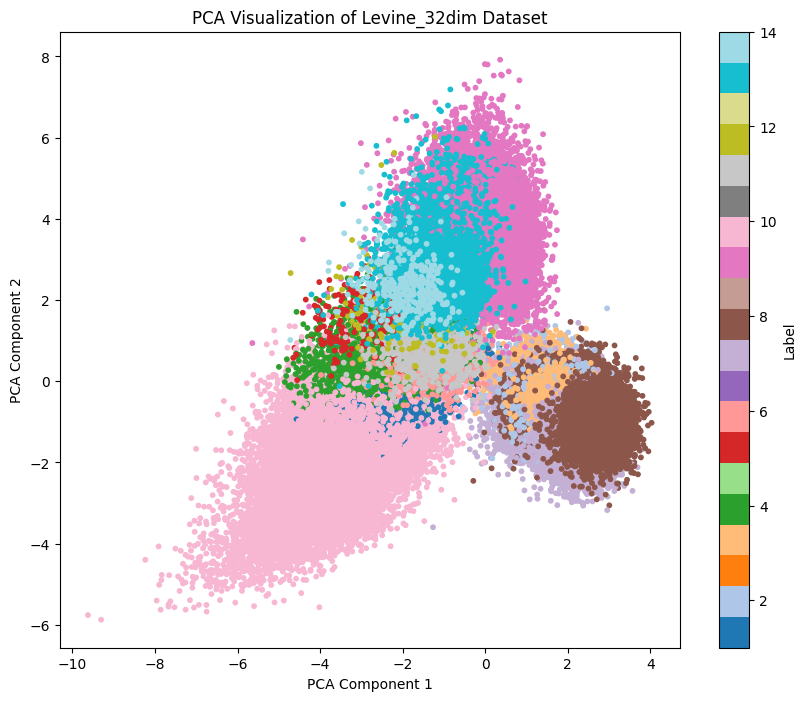

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Exclude the specified columns
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']
data_filtered = data.drop(columns=exclude_columns)

# Standardize the data (z-score normalization)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_filtered)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(data_standardized)

# Add the PCA results to the original data for visualization
data['PCA Component 1'] = pca_result[:, 0]
data['PCA Component 2'] = pca_result[:, 1]

# Plot the PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data['PCA Component 1'], data['PCA Component 2'], c=data['label'], cmap='tab20', s=10)
plt.colorbar(scatter, label='Label')
plt.title('PCA Visualization of Levine_32dim Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


##3D PCA graph

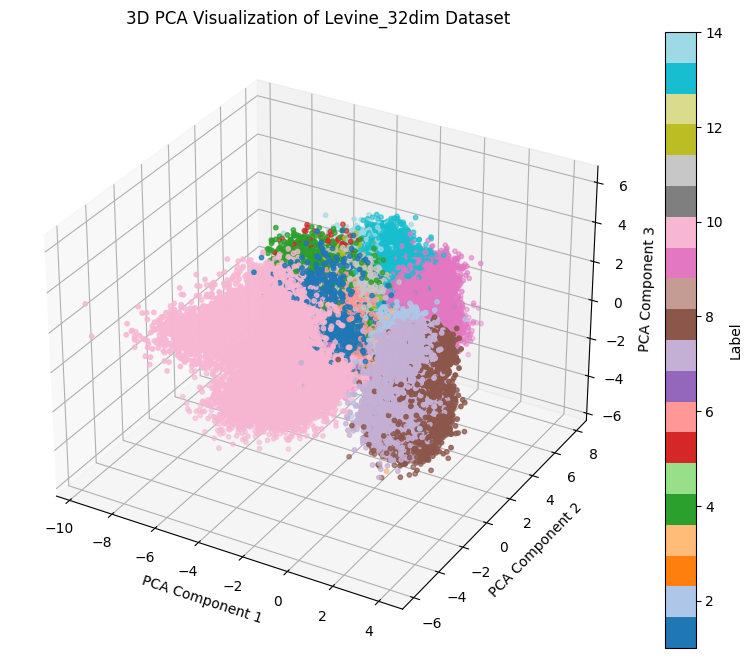

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting

# Load the dataset
# data = pd.read_csv('/content/drive/MyDrive/Datasets/Levine_32dim.fcs.csv')

# Exclude the specified columns
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']
data_filtered = data.drop(columns=exclude_columns)

# Standardize the data (z-score normalization)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_filtered)

# Perform PCA
pca = PCA(n_components=3)  # Reduce to 3 dimensions for 3D visualization
pca_result = pca.fit_transform(data_standardized)

# Add the PCA results to the original data for visualization
data['PCA Component 1'] = pca_result[:, 0]
data['PCA Component 2'] = pca_result[:, 1]
data['PCA Component 3'] = pca_result[:, 2]

# Plot the PCA results in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
scatter = ax.scatter(data['PCA Component 1'], data['PCA Component 2'], data['PCA Component 3'],
                     c=data['label'], cmap='tab20', s=10)

# Add color bar and labels
plt.colorbar(scatter, label='Label')
ax.set_title('3D PCA Visualization of Levine_32dim Dataset')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Show the plot
plt.show()


##Variance, Cumulative Proportion, and Standard Deviation Analysis

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



# Exclude the specified columns
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']
data_filtered = data.drop(columns=[col for col in exclude_columns if col in data.columns])

# The rest of your code...

# Standardize the data (z-score normalization)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_filtered)

# Perform PCA
pca = PCA(n_components=4)  # Use 4 principal components
pca.fit(data_standardized)

# Extract the required information
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
standard_deviation = pca.singular_values_ / (len(data_standardized) - 1)**0.5

# Create a DataFrame for the output
pca_summary = pd.DataFrame({
    'PC1': [standard_deviation[0], explained_variance[0], cumulative_variance[0]],
    'PC2': [standard_deviation[1], explained_variance[1], cumulative_variance[1]],
    'PC3': [standard_deviation[2], explained_variance[2], cumulative_variance[2]],
    'PC4': [standard_deviation[3], explained_variance[3], cumulative_variance[3]]
}, index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'])

# Round the numbers for better readability
pca_summary = pca_summary.map(lambda x: f'{x:.4f}')

# Apply styles to the DataFrame
styled_summary = (pca_summary.style
                  .set_caption("PCA Summary")
                  .set_table_styles(
                      [{'selector': 'caption', 'props': [('font-size', '16px'), ('color', 'black'), ('font-weight', 'bold')]}]
                  )
                  .background_gradient(cmap='coolwarm', axis=None)
                  .set_properties(**{'text-align': 'center'})
)

# Hiding the index column manually (workaround)
styled_summary.set_table_styles({
    'index': [{'selector': '', 'props': 'display:none;'}]  # Hides the index column
})

# Display the styled DataFrame
styled_summary


In [ ]:
# Separate labeled and unlabeled data based on non-NaN and NaN values in the 'label' column
df_labeled = df[df['label'].notnull()]
df_unlabeled = df[df['label'].isnull()]

# Print the shapes of labeled and unlabeled data
print("Labeled Data Shape:", df_labeled.shape)
print("Unlabeled Data Shape:", df_unlabeled.shape)


Labeled Data Shape: (104184, 37)
Unlabeled Data Shape: (161443, 37)


##**Binary Masking**

In [ ]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

# Create a sample DataFrame called 'demodata' for demonstration
demodata = pd.DataFrame({
    'column1': [5, 12, 18, 7],
    'column2': [10, 20, 15, 30],
    'column3': [25, 35, 40, 45]
})

# Define the probability of masking (e.g., 0.3 means a 30% chance each element will be masked)
p_m = 0.3

# Convert 'demodata' to a NumPy array for masking
data_array = demodata.values

# Generate a binary mask based on the probability, where 1 = not masked, 0 = masked
mask = np.random.binomial(1, 1 - p_m, data_array.shape)  # Reverse probability for desired 1/0 output

# Convert to a DataFrame for easier analysis
binary_mask_df = pd.DataFrame(mask, columns=demodata.columns)

print("Original DataFrame:\n", demodata)
print("\nBinary Mask DataFrame:\n", binary_mask_df)


Original DataFrame:
    column1  column2  column3
0        5       10       25
1       12       20       35
2       18       15       40
3        7       30       45

Binary Mask DataFrame:
    column1  column2  column3
0        1        0        0
1        1        1        1
2        1        0        1
3        0        1        0


##**Random Shuffling of Data**

In [ ]:
import numpy as np
import pandas as pd

# Create a sample DataFrame called 'demodata' for demonstration
demodata = pd.DataFrame({
    'column1': [5, 12, 18, 7],
    'column2': [10, 20, 15, 30],
    'column3': [25, 35, 40, 45]
})

# Shuffle each column in the DataFrame independently
shuffled_demodata = demodata.apply(lambda col: np.random.permutation(col))

print("Original DataFrame:\n", demodata)
print("\nShuffled DataFrame:\n", shuffled_demodata)


Original DataFrame:
    column1  column2  column3
0        5       10       25
1       12       20       35
2       18       15       40
3        7       30       45

Shuffled DataFrame:
    column1  column2  column3
0        5       30       25
1       18       15       40
2       12       10       35
3        7       20       45


##**Corrupted DataFrame**
Formula = ( x.values * (1 - m) + x_shuffled.values * m)




In [ ]:
import numpy as np
import pandas as pd

# Create a sample DataFrame called 'x' (original data)
x = pd.DataFrame({
    'column1': [5, 12, 18, 7],
    'column2': [10, 20, 15, 30],
    'column3': [25, 35, 40, 45]
})

# Define the probability of masking (e.g., 0.3 means a 30% chance each element will be masked)
p_m = 0.3

# Generate a binary mask matrix 'm'
m = np.random.binomial(1, 1 - p_m, x.shape)
binary_mask_df = pd.DataFrame(m, columns=x.columns)

# Shuffle each column in 'x' independently to create 'x_shuffled'
x_shuffled = x.apply(lambda col: np.random.permutation(col))

# Calculate the corrupted DataFrame 'x_corrupted' using the formula
x_corrupted_array = x.values * (1 - m) + x_shuffled.values * m
x_corrupted = pd.DataFrame(x_corrupted_array, columns=x.columns)

# Display results
print("Original DataFrame (x):\n", x)
print("\nBinary Mask DataFrame (m):\n", binary_mask_df)
print("\nShuffled DataFrame (x_shuffled):\n", x_shuffled)
print("\nCorrupted DataFrame (x_corrupted):\n", x_corrupted)


Original DataFrame (x):
    column1  column2  column3
0        5       10       25
1       12       20       35
2       18       15       40
3        7       30       45

Binary Mask DataFrame (m):
    column1  column2  column3
0        1        1        1
1        1        1        0
2        1        1        1
3        1        0        1

Shuffled DataFrame (x_shuffled):
    column1  column2  column3
0       12       20       40
1        7       15       45
2       18       30       25
3        5       10       35

Corrupted DataFrame (x_corrupted):
    column1  column2  column3
0       12       20       40
1        7       15       35
2       18       30       25
3        5       30       35


##**Applying Binary Mask, Shuffling, and Handling Corrupted Data on the Original Dataset**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Exclude the specified columns
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']
# Filter out columns that are not in the DataFrame
exclude_columns = [col for col in exclude_columns if col in data.columns]

# Now drop the filtered columns
data_filtered = data.drop(columns=exclude_columns)

# Set the probability of masking
p_m = 0.3

# Generate a binary mask matrix 'm'
m = np.random.binomial(1, 1 - p_m, data_filtered.shape)
binary_mask_df = pd.DataFrame(m, columns=data_filtered.columns)

# Shuffle each column in 'data_filtered' independently to create 'data_shuffled'
data_shuffled = data_filtered.apply(lambda col: np.random.permutation(col))

# Calculate the corrupted DataFrame 'data_corrupted' using the formula
data_corrupted_array = data_filtered.values * (1 - m) + data_shuffled.values * m
data_corrupted = pd.DataFrame(data_corrupted_array, columns=data_filtered.columns)

# Display results
print("Binary Mask DataFrame (m):\n", binary_mask_df)
print("\nShuffled DataFrame (data_shuffled):\n", data_shuffled)
print("\nCorrupted DataFrame (data_corrupted):\n", data_corrupted)


Binary Mask DataFrame (m):
         DNA1  DNA2  CD45RA  CD133  CD19  CD22  CD11b  CD4  CD8  CD34  ...  \
0          1     1       1      1     1     1      1    0    1     1  ...   
1          1     1       1      1     1     0      0    1    0     1  ...   
2          1     1       1      1     0     1      1    0    1     1  ...   
3          1     1       1      0     1     0      1    0    1     1  ...   
4          1     0       1      1     0     1      0    1    1     1  ...   
...      ...   ...     ...    ...   ...   ...    ...  ...  ...   ...  ...   
265622     0     1       0      1     0     1      1    1    1     1  ...   
265623     1     0       1      0     0     0      1    0    0     1  ...   
265624     0     1       1      1     1     1      0    1    1     0  ...   
265625     1     1       1      1     1     1      1    0    0     1  ...   
265626     0     1       1      1     1     1      0    1    0     1  ...   

        CD38  CD13  CD3  CD61  CD117  CD49d  HL

##**New Masking**
Formula = (mask_new = 1 * (data_filtered != data_corrupted))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Exclude the specified columns
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']
data_filtered = data.drop(columns=[col for col in exclude_columns if col in data.columns])

# Set the probability of masking
p_m = 0.3

# Generate a binary mask matrix 'm' (changes every run)
m = np.random.binomial(1, 1 - p_m, data_filtered.shape)
binary_mask_df = pd.DataFrame(m, columns=data_filtered.columns)

# Shuffle each column in 'data_filtered' independently to create 'data_shuffled' (changes every run)
data_shuffled = data_filtered.apply(lambda col: np.random.permutation(col))

# Calculate the corrupted DataFrame 'data_corrupted' using the formula
data_corrupted_array = data_filtered.values * (1 - m) + data_shuffled.values * m
data_corrupted = pd.DataFrame(data_corrupted_array, columns=data_filtered.columns)

# Generate mask_new to indicate differences between original and corrupted data
mask_new = 1 * (data_filtered != data_corrupted)

# Print only the new mask matrix
print("New Mask Matrix (mask_new):\n", mask_new)


New Mask Matrix (mask_new):
         DNA1  DNA2  CD45RA  CD133  CD19  CD22  CD11b  CD4  CD8  CD34  ...  \
0          0     1       1      1     1     1      1    1    1     1  ...   
1          1     1       1      1     1     1      1    1    1     1  ...   
2          1     0       1      1     1     0      1    1    1     1  ...   
3          1     1       1      0     1     1      1    1    1     0  ...   
4          1     1       0      1     0     1      1    0    1     1  ...   
...      ...   ...     ...    ...   ...   ...    ...  ...  ...   ...  ...   
265622     1     1       0      1     0     1      1    1    1     1  ...   
265623     1     1       0      1     0     1      1    0    1     0  ...   
265624     1     1       0      1     0     1      1    1    1     1  ...   
265625     1     1       1      1     0     0      0    0    0     1  ...   
265626     0     0       0      1     1     1      0    1    1     1  ...   

        CD38  CD13  CD3  CD61  CD117  CD49d  H

##**Separating Features and Labels in Unlabeled Data**

In [ ]:
import numpy as np
import pandas as pd



# Define the target column used for labeling
label_column = 'label'
df=data
# Separate labeled and unlabeled data using label_df
label_df = df[df[label_column].notnull()]  # labeled data
unlabeled_df = df[df[label_column].isnull()]  # unlabeled data

# Split features and labels for labeled data
x_labeled = label_df.drop(columns=[label_column])
y_labeled = label_df[label_column]

# Split features and labels for unlabeled data
x_unlabeled = unlabeled_df.drop(columns=[label_column])
y_unlabeled = unlabeled_df[label_column]

# Display results
print("Labeled Features (x_labeled):\n", x_labeled)
print("\nLabeled Labels (y_labeled):\n", y_labeled)
print("\nUnlabeled Features (x_unlabeled):\n", x_unlabeled)
print("\nUnlabeled Labels (y_unlabeled):\n", y_unlabeled)



Labeled Features (x_labeled):
         Cell_length      DNA1      DNA2    CD45RA     CD133      CD19  \
0                22  4.391057  4.617262  0.162691 -0.029585 -0.006696   
1                35  4.340481  4.816692  0.701349 -0.038280 -0.016654   
2                32  3.838727  4.386369  0.603568 -0.032216  0.073855   
3                29  4.255806  4.830048  0.433747 -0.027611 -0.017661   
4                25  3.976909  4.506433 -0.008809 -0.030297  0.080423   
...             ...       ...       ...       ...       ...       ...   
104179           58  6.827981  7.249403 -0.000106 -0.030641  1.432347   
104180           55  6.683204  7.166172  0.692668 -0.037335  1.639063   
104181           40  6.911546  7.152603 -0.036795 -0.014477  1.637975   
104182           48  6.700332  7.100771  0.308817  0.075762  1.455129   
104183           64  6.559460  7.080928  0.519572  0.097257  1.346523   

            CD22     CD11b       CD4       CD8  ...      CD38      CD13  \
0       0.066388 

In [ ]:
from sklearn.model_selection import train_test_split
# Separate labeled and unlabeled data
df_labeled = df[df['label'].notnull()]  # Labeled data
df_unlabeled = df[df['label'].isnull()]  # Unlabeled data

# Separate features and target for labeled data
x_labeled = df_labeled.drop(columns=['label'])  # Features
y_labeled = df_labeled['label']                  # Target

# Separate features for unlabeled data
x_unlabeled = df_unlabeled.drop(columns=['label'])  # Features (no labels)

# Split the labeled data into training and testing sets (e.g., 70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(x_labeled, y_labeled, test_size=0.3, random_state=42)

print("\nTraining Features (x_train):\n", x_train.head())
print("\nTraining Labels (y_train):\n", y_train.head())
print("\nTesting Features (x_test):\n", x_test.head())
print("\nTesting Labels (y_test):\n", y_test.head())



Training Features (x_train):
        Cell_length      DNA1      DNA2    CD45RA     CD133      CD19  \
64113           25  3.899656  4.594272  0.976652  0.302811  0.154761   
82744           31  6.592998  6.901888  0.431481 -0.052898 -0.037690   
24294           41  3.543583  4.467671  0.377192  0.219081  0.245478   
7820            38  4.305227  4.881685  0.199351  0.100678 -0.025812   
43295           26  4.159271  4.861015  0.831285  0.191518  2.002712   

           CD22     CD11b       CD4       CD8  ...      CD38      CD13  \
64113 -0.011676  3.180236  1.465950  0.086209  ...  1.563844  0.480488   
82744 -0.029715 -0.040846  0.914311  0.022305  ...  1.232765  0.100678   
24294  0.193328  0.075123  0.936352 -0.044813  ...  0.486930  0.046766   
7820  -0.002898  1.437247 -0.013400 -0.001012  ...  1.250272  0.731957   
43295  3.387782  0.179219  0.115231 -0.010963  ...  2.883403  0.345273   

            CD3      CD61     CD117     CD49d    HLA-DR      CD64      CD41  \
64113  0.017

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the unlabeled data
x_unlabeled_scaled = scaler.fit_transform(x_unlabeled)

# Convert back to a DataFrame if needed (optional, for better readability)
x_unlabeled_scaled = pd.DataFrame(x_unlabeled_scaled, columns=x_unlabeled.columns)

from sklearn.model_selection import train_test_split
df_labeled = df[df['label'].notnull()]  # Labeled data
df_unlabeled = df[df['label'].isnull()]  # Unlabeled data

# Separate features and target for labeled data
X_labeled = df_labeled.drop(columns=['label'])  # Features
y_labeled = df_labeled['label']                  # Target


# Split the labeled data into training and testing sets (e.g., 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of Training Features (X_train):", X_train.shape)
print("Shape of Training Labels (y_train):", y_train.shape)
print("Shape of Testing Features (X_test):", X_test.shape)



Shape of Training Features (X_train): (72928, 36)
Shape of Training Labels (y_train): (72928,)
Shape of Testing Features (X_test): (31256, 36)


##**Splitting Labeled Dataset into Training and Testing Sets (70% Training, 30% Testing)**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split



# Define the target column used for labeling
label_column = 'label'

# Separate labeled data
label_df = df[df[label_column].notnull()]

# Split features and labels for labeled data
x_labeled = label_df.drop(columns=[label_column])
y_labeled = label_df[label_column]

# Split labeled data into training and testing sets (70%-30% split)
x_train, x_test, y_train, y_test = train_test_split(x_labeled, y_labeled, test_size=0.3, random_state=42)

# Display results
print("Training Features (x_train):\n", x_train)
print("\nTesting Features (x_test):\n", x_test)
print("\nTraining Labels (y_train):\n", y_train)
print("\nTesting Labels (y_test):\n", y_test)


Training Features (x_train):
         Cell_length      DNA1      DNA2    CD45RA     CD133      CD19  \
64113            25  3.899656  4.594272  0.976652  0.302811  0.154761   
82744            31  6.592998  6.901888  0.431481 -0.052898 -0.037690   
24294            41  3.543583  4.467671  0.377192  0.219081  0.245478   
7820             38  4.305227  4.881685  0.199351  0.100678 -0.025812   
43295            26  4.159271  4.861015  0.831285  0.191518  2.002712   
...             ...       ...       ...       ...       ...       ...   
54886            15  4.074604  4.747052  0.431805  0.228761 -0.011434   
76820            33  6.584427  6.882117  0.640424 -0.044057 -0.013737   
103694           43  6.719895  7.080995  0.306443 -0.026339  2.074008   
860              26  3.886782  4.886936  0.060176  0.233401 -0.020592   
15795            25  3.523293  4.289820  0.646288 -0.028126  0.184879   

            CD22     CD11b       CD4       CD8  ...      CD38      CD13  \
64113  -0.011676  

##**Logistic Regression and XGBoost Models**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Define the target column used for labeling
label_column = 'label'

# Separate labeled data
label_df = df[df[label_column].notnull()]

# Split features and labels for labeled data
x_labeled = label_df.drop(columns=[label_column])
y_labeled = label_df[label_column]

# Encode labels if necessary (e.g., for non-numeric labels)
label_encoder = LabelEncoder()
y_labeled = label_encoder.fit_transform(y_labeled)

# Split labeled data into training and testing sets (70%-30% split)
x_train, x_test, y_train, y_test = train_test_split(x_labeled, y_labeled, test_size=0.3, random_state=42)

# Scale features for Logistic Regression and XGBoost
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Logistic Regression Model with increased max_iter and scaled data
logistic_model = LogisticRegression(max_iter=2000)
logistic_model.fit(x_train_scaled, y_train)
y_test_hat_logistic = logistic_model.predict_proba(x_test_scaled)

# XGBoost Model (using scaled data)
xgb_model = XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(x_train_scaled, y_train)  # Use scaled data for training
y_test_hat_xgb = xgb_model.predict_proba(x_test_scaled)  # Use scaled test data for prediction

# Display the predicted probabilities for Logistic Regression and XGBoost
print("Logistic Regression Predicted Probabilities:\n", y_test_hat_logistic)
print("\nXGBoost Predicted Probabilities:\n", y_test_hat_xgb)


Logistic Regression Predicted Probabilities:
 [[3.80171505e-14 1.79677755e-16 6.39379100e-15 ... 5.38996491e-12
  3.86042318e-11 1.08306939e-10]
 [3.47565068e-19 1.24709876e-15 1.38143214e-17 ... 2.40264684e-11
  7.09480485e-05 1.10783946e-09]
 [4.63781842e-14 1.51592963e-11 2.34262947e-15 ... 2.38911411e-14
  4.45010473e-07 2.94420163e-12]
 ...
 [1.44640950e-10 2.47678160e-05 1.63766974e-09 ... 2.97537303e-10
  1.62026427e-11 9.27725670e-10]
 [2.40986517e-15 2.18268999e-11 5.48917631e-13 ... 6.86061570e-15
  1.29394377e-07 1.21871407e-08]
 [4.03181434e-12 4.30914823e-08 3.20390902e-12 ... 3.78280383e-16
  1.88017463e-08 1.25449672e-13]]

XGBoost Predicted Probabilities:
 [[5.1860439e-07 5.7016132e-07 3.9342046e-07 ... 8.7231723e-07
  7.8322529e-07 5.8524409e-07]
 [8.1559364e-07 1.7003977e-06 6.5709645e-07 ... 1.0578570e-06
  1.6773010e-05 2.0757868e-06]
 [5.4707402e-07 7.7930986e-07 5.7252220e-07 ... 1.0011920e-06
  4.1819781e-06 9.0937459e-07]
 ...
 [7.2769018e-07 3.8097273e-06 7.321

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

def logit(x_train, y_train, x_test):
    """Logistic Regression.

    Args:
        x_train: Training features.
        y_train: Training labels.
        x_test: Testing features.

    Returns:
        y_test_hat: Predicted probabilities for x_test.
    """
    # Convert labels into proper format
    if len(y_train.shape) > 1:
        y_train = donvert_matrix_to_vector(y_train)

    # Define and fit the model on the training dataset
    model = LogisticRegression()
    model.fit(x_train, y_train)

    # Predict probabilities on x_test
    y_test_hat = model.predict_proba(x_test)

    return y_test_hat
y_test_prob = logit(X_train, y_train, X_test)

# Display the probabilities
print("Predicted probabilities for the test set:")
print(y_test_prob)

# Compute log loss
log_loss_value = log_loss(y_test, y_test_prob)

# Display log loss
print("Log loss for the test set:", log_loss_value)


Predicted probabilities for the test set:
[[1.30583141e-12 2.27467522e-16 4.31714753e-17 ... 8.38929171e-13
  4.20412096e-14 1.90886300e-13]
 [3.87366475e-14 6.12113192e-14 1.05364349e-15 ... 1.12888187e-11
  2.64599797e-04 1.64304196e-10]
 [1.02875938e-10 2.47499943e-10 4.12872350e-12 ... 1.22168402e-10
  1.37756366e-06 4.28468825e-11]
 ...
 [8.68415824e-08 1.10911440e-05 1.15756401e-08 ... 2.25998866e-08
  2.59097907e-10 2.44931037e-10]
 [4.60056178e-09 4.09633386e-10 2.81129925e-11 ... 1.88773587e-08
  6.66829160e-06 2.08996267e-07]
 [2.14714696e-09 7.89731156e-09 7.85003780e-11 ... 3.84776742e-11
  5.79418727e-08 4.98591439e-12]]
Log loss for the test set: 0.03329241130269107


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
import numpy as np

def xgboost_model(x_train, y_train, x_test):
    """XGBoost Classifier.

    Args:
        x_train: Training features.
        y_train: Training labels.
        x_test: Testing features.

    Returns:
        y_test_prob: Predicted probabilities for x_test.
    """
    # Convert labels to proper format and zero-based index if necessary
    if len(y_train.shape) > 1:
        y_train = donvert_matrix_to_vector(y_train)

    # Check if labels need to be shifted to start from 0
    if np.min(y_train) != 0:
        y_train = y_train - np.min(y_train)  # Shift labels to start from 0

    # Define and fit the XGBoost model on the training dataset
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(x_train, y_train)

    # Predict probabilities on x_test
    y_test_prob = model.predict_proba(x_test)

    return y_test_prob

# Example usage
# Assuming y_test is the true labels for X_test
# Check if y_test needs to be shifted to start from 0 for log loss calculation
if np.min(y_test) != 0:
    y_test_zero_based = y_test - np.min(y_test)
else:
    y_test_zero_based = y_test

y_test_prob = xgboost_model(X_train, y_train, X_test)

# Display the probabilities
print("Predicted probabilities for the test set:")
print(y_test_prob)

# Compute log loss
log_loss_value = log_loss(y_test_zero_based, y_test_prob)
print("Log loss for the test set:", log_loss_value)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:39:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Predicted probabilities for the test set:
[[5.1860439e-07 5.7017002e-07 3.9342234e-07 ... 8.7231638e-07
  7.8322529e-07 5.8524296e-07]
 [8.1559443e-07 1.7004106e-06 6.5709958e-07 ... 1.0578590e-06
  1.6773043e-05 2.0757868e-06]
 [5.4707510e-07 7.7939086e-07 5.7252436e-07 ... 1.0011939e-06
  4.1819862e-06 9.0937459e-07]
 ...
 [7.2769092e-07 3.8095675e-06 7.3217876e-07 ... 6.5145679e-07
  5.3072574e-07 4.8228475e-07]
 [2.6380076e-06 2.8987354e-06 2.4175074e-06 ... 4.4621897e-06
  1.0261622e-05 3.1510957e-05]
 [8.4509293e-07 7.6321942e-07 6.7003754e-07 ... 7.0236740e-07
  3.7610098e-06 9.6112626e-07]]
Log loss for the test set: 0.00400363072165128


##Logistic Regression Log Loss

In [ ]:
from sklearn.metrics import log_loss

# Calculate log loss for Logistic Regression
logistic_loss = log_loss(y_test, y_test_hat_logistic)
print("Logistic Regression Log Loss:", logistic_loss)


Logistic Regression Log Loss: 0.01262958633922572


##XGBoost Log Loss

In [ ]:
from sklearn.metrics import log_loss


# Calculate log loss for XGBoost
xgb_loss = log_loss(y_test, y_test_hat_xgb)
print("XGBoost Log Loss:", xgb_loss)

XGBoost Log Loss: 0.004003640001628129


##**ENCODER MODEL**

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

def binary_mask(p_m, data):
    """Generates a binary mask with probability p_m."""
    return np.random.binomial(1, 1 - p_m, data.shape)

def corruption(mask, data):
    num_samples, num_features = data.shape
    shuffled_data = np.zeros([num_samples, num_features])

    for feature_idx in range(num_features):
        shuffled_indices = np.random.permutation(num_samples)
        shuffled_data[:, feature_idx] = data[shuffled_indices, feature_idx]

    data_corrupted = data * (1 - mask) + shuffled_data * mask
    mask_new = (data != data_corrupted).astype(int)

    return mask_new, data_corrupted

def self_supervised(x_unlabeled, p_m, alpha, parameters):
    epochs = parameters['epochs']
    batch_size = parameters['batch_size']
    _, dimension = x_unlabeled.shape

    # Define model architecture
    input_layer = Input(shape=(dimension,))
    h = Dense(int(dimension), activation='relu')(input_layer)

    output1 = Dense(int(dimension), activation='sigmoid', name='mask_estimation')(h)
    output2 = Dense(int(dimension), activation='sigmoid', name='feature_estimation')(h)

    model = Model(inputs=input_layer, outputs=[output1, output2])

    # Compile model with appropriate loss functions and weights
    model.compile(
        optimizer="rmsprop",
        loss={'mask_estimation': 'binary_crossentropy', 'feature_estimation': 'mean_squared_error'},
        loss_weights={'mask_estimation': 1.0, 'feature_estimation': float(alpha)}  # Corrected to use float
    )

    # Generate corrupted input and mask labels
    corruption_binary_mask = binary_mask(p_m, x_unlabeled)
    x_unlabeled_corrupted,mask_label = corruption(corruption_binary_mask, x_unlabeled)

    assert x_unlabeled_corrupted.shape == mask_label.shape


    # Train model
    model.fit(x_unlabeled_corrupted, {'mask_estimation': mask_label, 'feature_estimation': x_unlabeled},
              epochs=epochs, batch_size=batch_size)

    # Display model summary (this will print the model's parameters)
    model.summary()

    # Define encoder
    name_of_layer = model.layers[1].name
    layer_output = model.get_layer(name_of_layer).output
    encoder = Model(inputs=model.input, outputs=layer_output)

    return encoder


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


# Exclude specified columns, only if they exist in the DataFrame
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']
exclude_columns = [col for col in exclude_columns if col in data.columns] # Filter out columns that are not in the DataFrame

# Now drop the filtered columns
data_filtered = data.drop(columns=exclude_columns)

# Standardize the data
scaler = StandardScaler()
x_unlabeled_scaled = scaler.fit_transform(data_filtered)  # Now x_unlabeled_scaled is defined

# Define other parameters
p_m = 0.3
alpha = 2.0
parameters = {
    'batch_size': 128,
    'epochs': 50,
}

# Run the self_supervised function with the scaled data
encoder_model = self_supervised(x_unlabeled_scaled, p_m, alpha, parameters)


Epoch 1/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - feature_estimation_loss: 0.0505 - loss: 2.0838 - mask_estimation_loss: 2.0332
Epoch 2/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - feature_estimation_loss: 0.0043 - loss: 2.0028 - mask_estimation_loss: 1.9986
Epoch 3/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - feature_estimation_loss: 0.0016 - loss: 2.0010 - mask_estimation_loss: 1.9994
Epoch 4/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - feature_estimation_loss: 0.0015 - loss: 1.9971 - mask_estimation_loss: 1.9956
Epoch 5/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - feature_estimation_loss: -3.1434e-04 - loss: 2.0016 - mask_estimation_loss: 2.0019
Epoch 6/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - feature_estimation_loss: -0.0113 - loss: 1.9880 - mask_estimation_loss: 1.9993
Epoch 7/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - feature_estimation_loss: -0.0080 - loss: 1.9950 - mask_estimation_loss: 2.0030
Epoch 8/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 35)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 35)             │          1,260 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ mask_estimation (Dense)   │ (None, 35)             │          1,260 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ feature_estimation        │ (None, 35)             │          1,260 │ dense[0][0]            │
│ (Dense)                   │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 7,562 (29.54 KB)

 Trainable params: 3,780 (14.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,782 (14.78 KB)

In [ ]:
from keras.layers import Input,Dense
from keras.models import Model
from keras import models
import numpy as np

def binary_mask(p_m, data):
    """Generates a binary mask with probability p_m for corruption."""
    # Get the shape of the data (number of rows, number of columns)
    num_rows, num_cols = data.shape
    # Create a DataFrame using the shape and column names
    # (If column names are not available, use a range of numbers)
    column_names = np.arange(num_cols) # Create a range of numbers as column names
    mask_df = pd.DataFrame(np.random.binomial(1, p_m, data.shape), columns=column_names)
    return mask_df

def x_corruption(mask, data):
    """Applies corruption to the data using the mask."""
    shuffled = data.apply(lambda col: np.random.permutation(col))
    return data * (1 - mask) + shuffled * mask

def self_supervised(x_unlabeled_scaled,p_m, alpha, parameters):
    """Trains a self-supervised model for feature extraction."""
    epochs = parameters['epochs']
    batch_size = parameters['batch_size']
    _,dimension = x_unlabeled_scaled.shape

    input_layer = Input(shape=(dimension,))
    h = Dense(int(dimension),activation='relu')(input_layer)

    output1 = Dense(int(dimension) , activation='sigmoid', name='mask_estimation')(h)
    output2 = Dense(int(dimension) , activation='sigmoid', name='feature_estimation')(h)

    model = Model(inputs = input_layer, outputs=[output1,output2])
    model.compile(optimizer="rmsprop",loss={'mask_estimation': 'binary_crossentropy', 'feature_estimation': 'mean_squared_error'},loss_weights={'mask_estimation': 1.0, 'feature_estimation': alpha})

    # Generate corrupted data and mask
    corruption_mask = binary_mask(p_m,x_unlabeled_scaled)
    x_unlabeled_corrupted = x_corruption(corruption_mask, pd.DataFrame(x_unlabeled_scaled)) # Convert x_unlabeled_scaled to DataFrame
    m_label = (x_unlabeled_scaled != x_unlabeled_corrupted).astype(int) # Calculate m_label

    # Fit the model
    model.fit(x_unlabeled_corrupted,{'mask_estimation':m_label,'feature_estimation':x_unlabeled_scaled},epochs=epochs,batch_size=batch_size)

    name_of_layer = model.layers[1].name # Assuming the encoder layer is the second layer
    layer_output = model.get_layer(name_of_layer).output
    encoder = models.Model(inputs=model.input , outputs=layer_output)
    model.summary()
    return encoder


x_unlab = x_unlabeled_scaled

p_m=0.3

alpha= 2.0

parameters={'batch_size':128,
            'epochs':50,
            }

encoder_model =self_supervised(x_unlab,p_m, alpha, parameters)

Epoch 1/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - feature_estimation_loss: 0.6320 - loss: 2.2708 - mask_estimation_loss: 1.6388
Epoch 2/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - feature_estimation_loss: 0.6094 - loss: 1.9771 - mask_estimation_loss: 1.3677
Epoch 3/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - feature_estimation_loss: 0.6085 - loss: 1.9675 - mask_estimation_loss: 1.3591
Epoch 4/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - feature_estimation_loss: 0.6076 - loss: 1.9585 - mask_estimation_loss: 1.3510
Epoch 5/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - feature_estimation_loss: 0.6071 - loss: 1.9552 - mask_estimation_loss: 1.3481
Epoch 6/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - feature_estimation_loss: 0.6065 - loss: 1.9556 - mask_estimation_loss: 1.3491
Epoch 7/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - feature_estimation_loss: 0.6060 - loss: 1.9556 - mask_estimation_loss: 1.3496
Epoch 8/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - featur

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 35)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 35)             │          1,260 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ mask_estimation (Dense)   │ (None, 35)             │          1,260 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ feature_estimation        │ (None, 35)             │          1,260 │ dense_2[0][0]          │
│ (Dense)                   │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 7,562 (29.54 KB)

 Trainable params: 3,780 (14.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,782 (14.78 KB)

In [ ]:
import os

# Define the path where you want to save the model
encoder_path = "content/encoder_model.keras"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(encoder_path), exist_ok=True)

# Save the model
encoder_model.save(encoder_path)

print(f"Model saved to {encoder_path}")

Model saved to content/encoder_model.keras


In [ ]:
from keras.models import load_model
encoder=load_model(encoder_path)

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import xgboost as xgb
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# Adjust y_train and y_test labels to start from 0 by subtracting the minimum label value
y_train -= y_train.min()
y_test -= y_test.min()

# Assuming 'data_filtered' was used to train the encoder
training_columns = data_filtered.columns

# Select the same columns from x_train and x_test and scale them
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[training_columns])  # Scale training data
x_test_scaled = scaler.transform(x_test[training_columns])        # Scale testing data

# Step 1: Define the encoder model and train it on x_unlab (assumed to be done beforehand)
# For demonstration, use the encoder to transform train and test data

# Use the encoder to get the encoded data for training and testing
x_train_scaled_encoded = encoder.predict(x_train_scaled)
x_test_scaled_encoded = encoder.predict(x_test_scaled)

# Check shapes
print("Encoded x_train shape:", x_train_scaled_encoded.shape)
print("Encoded x_test shape:", x_test_scaled_encoded.shape)

# Step 2: Logistic Regression
log_reg = LogisticRegression(max_iter=1000)  # Set max_iter to a higher value for convergence
log_reg.fit(x_train_scaled_encoded, y_train)

# Predict on the test set using Logistic Regression
y_encoded_log_reg = log_reg.predict_proba(x_test_scaled_encoded)

# Compute log loss for logistic regression predictions
log_reg_loss = log_loss(y_test, y_encoded_log_reg)
print("Log Loss for Logistic Regression:", log_reg_loss)

# Step 3: XGBoost Model
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(x_train_scaled_encoded, y_train)

# Predict on the test set using XGBoost
y_encoded_xgb = xgb_model.predict_proba(x_test_scaled_encoded)

# Compute log loss for XGBoost predictions
xgb_loss = log_loss(y_test, y_encoded_xgb)
print("Log Loss for XGBoost:", xgb_loss)

2279/2279 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Encoded x_train shape: (72928, 35)
Encoded x_test shape: (31256, 35)
Log Loss for Logistic Regression: 0.03279117463606171
Log Loss for XGBoost: 0.056986778799621204


#Overview of Function

Function for the model, train, semi_supervised

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np  # Ensure numpy is imported

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# Define the model function
def build_model(input_dimension, hidden_dimension, label_dimension, activation=tf.nn.relu):
    inputs = tf.keras.Input(shape=(input_dimension,), name='model_input')
    x = layers.Dense(hidden_dimension, activation=activation, name='model_dense_layer_1')(inputs)
    x = layers.Dense(hidden_dimension, activation=activation, name='model_dense_layer_2')(x)
    y_logit = layers.Dense(label_dimension, activation=None, name='model_logit_output')(x)
    y = layers.Activation('softmax', name='model_output')(y_logit)
    model = models.Model(inputs=inputs, outputs=[y_logit, y], name="model")
    return model

# Define the training function
def train(feature_batch, label_batch, unlabeled_feature_batch, model, beta, supv_loss_fn, optimizer):
    with tf.GradientTape() as tape:
        y_logit, y = model(feature_batch, training=True)
        y_loss = supv_loss_fn(label_batch, y)

        unlabeled_y_logit, unlabeled_y = model(unlabeled_feature_batch, training=True)
        unlabeled_y_loss = tf.reduce_mean(tf.nn.moments(unlabeled_y_logit, axes=0)[1])

        total_loss = y_loss + beta * unlabeled_y_loss
        grads = tape.gradient(total_loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return total_loss

# Define the semi-supervised function
def semi_supervised(x_train, y_train, x_unlabeled, x_test, parameters, mask_probability, K, beta):
    hidden_dimension = parameters['hidden_dimension']
    batch_size = parameters['batch_size']
    epochs = parameters['epochs']
    input_dimension = x_train.shape[1]
    label_dimension = len(np.unique(y_train)) if y_train.ndim == 1 else y_train.shape[1]

    # Map class labels if y_train is categorical
    if y_train.ndim == 1 or y_train.shape[1] == 1:
        class_mapping = {label: idx for idx, label in enumerate(np.unique(y_train))}
        y_train = np.vectorize(class_mapping.get)(y_train)

    # Split training data into training and validation sets
    index = np.random.permutation(x_train.shape[0])
    train_index = index[:int(len(index) * 0.9)]
    valid_index = index[int(len(index) * 0.9):]

    splitted_train_x = x_train[train_index, :]
    splitted_train_y = y_train[train_index]
    splitted_valid_x = x_train[valid_index, :]
    splitted_valid_y = y_train[valid_index]

    # Data encoding
    encoder_model_path = "/content/encoder_model.keras"
    encoder = tf.keras.models.load_model(encoder_model_path)

    x_valid_encoded = encoder.predict(splitted_valid_x)
    x_test_encoded = encoder.predict(x_test)

    # Initialize the supervised learning model
    supervised_model = build_model(
        input_dimension=encoder.output_shape[1],
        hidden_dimension=hidden_dimension,
        label_dimension=label_dimension
    )
    optimizer = optimizers.Adam()
    supv_loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

    for epoch in range(epochs):
        batch_index = np.random.choice(len(splitted_train_x), batch_size, replace=False)
        batch_x = splitted_train_x[batch_index]
        batch_y = splitted_train_y[batch_index]
        batch_x_encoded = encoder.predict(batch_x)

        batch_unlabeled_index = np.random.choice(len(x_unlabeled), batch_size, replace=False)
        batch_unlabeled_x = x_unlabeled[batch_unlabeled_index]

        batch_unlabeled_x_shuffled = []
        for _ in range(K):
            mask_batch_unlabeled = binary_mask(mask_probability, batch_unlabeled_x)
            _, unlabeled_shuffled_temp = corruption(mask_batch_unlabeled, batch_unlabeled_x)
            unlabeled_shuffled_temp_encoded = encoder.predict(unlabeled_shuffled_temp)
            batch_unlabeled_x_shuffled.append(unlabeled_shuffled_temp_encoded)

        batch_unlabeled_x_shuffled = np.concatenate(batch_unlabeled_x_shuffled, axis=0)

        total_loss = train(batch_x_encoded, batch_y, batch_unlabeled_x_shuffled, supervised_model, beta, supv_loss_fn, optimizer)

        y_valid_logit, y_valid = supervised_model(x_valid_encoded, training=False)
        y_valid_loss = supv_loss_fn(splitted_valid_y, y_valid_logit)

        if epoch % 100 == 0:
            print(f"Epoch: {epoch}/{epochs}, Validation Loss: {y_valid_loss:.4f}")

    y_test_logit, y_test = supervised_model(x_test_encoded, training=False)
    return y_test_logit, supervised_model


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np

# Define the model
def model(input_dimension, hidden_dimension, label_dimension, activation=tf.nn.relu):
    # The shape argument should be a tuple. Assuming input_dimension is a single integer,
    #  we reshape it into a tuple of the form (input_dimension,)
    inputs = tf.keras.Input(shape=(input_dimension,), name='model_input')
    x = layers.Dense(hidden_dimension, activation=activation, name='model_dense_layer_1')(inputs)
    x = layers.Dense(hidden_dimension, activation=activation, name='model_dense_layer_2')(x)
    y_logit = layers.Dense(label_dimension, activation=None, name='model_logit_output')(x)
    y = layers.Activation('softmax', name='model_output')(y_logit)
    return tf.keras.Model(inputs=inputs, outputs=[y_logit, y], name="model")

# Training function
def train(feature_batch, label_batch, unlabeled_feature_batch, model, beta, supv_loss_fn, optimizer):
    with tf.GradientTape() as tape:
        # Labeled data loss
        y_logit, _ = model(feature_batch, training=True)
        y_loss = supv_loss_fn(label_batch, y_logit)

        # Unlabeled data loss
        unlabeled_y_logit, _ = model(unlabeled_feature_batch, training=True)
        _, variance = tf.nn.moments(unlabeled_y_logit, axes=0)
        unlabeled_y_loss = tf.reduce_mean(variance)

        # Total loss
        total_loss = y_loss + beta * unlabeled_y_loss

    # Gradient computation and update
    grads = tape.gradient(total_loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return total_loss



# Semi-supervised function
def semi_supervised(x_train, y_train, x_unlabeled, x_test, parameters, mask_probability, K, beta, encoder_path):
    # Load pre-trained encoder
    encoder = load_model(encoder_path)

    # Get the input shape expected by the encoder
    encoder_input_shape = encoder.input_shape[1:]

    # Ensure data matches the encoder's expected input shape by selecting the correct number of columns
    training_columns = x_train.columns[:encoder_input_shape[0]]  # Assuming data was filtered previously
    x_train_values = x_train[training_columns].values  # Apply to x_train
    x_test_values = x_test[training_columns].values  # Apply to x_test
    x_unlabeled_values = x_unlabeled[training_columns].values  # Apply to x_unlabeled

    # Hyperparameters
    hidden_dimension = parameters['hidden_dim']
    batch_size = parameters['batch_size']
    epochs = parameters['iterations']
    input_dimension = x_train_values.shape[1]

    # Label preprocessing: One-hot encoding for CategoricalCrossentropy
    unique_classes = np.unique(y_train)
    label_dimension = len(unique_classes)
    class_mapping = {label: idx for idx, label in enumerate(unique_classes)}
    y_train_mapped = np.vectorize(class_mapping.get)(y_train)
    y_train_one_hot = to_categorical(y_train_mapped, num_classes=label_dimension)

    # Data splitting
    index = np.random.permutation(x_train_values.shape[0])
    train_index = index[:int(len(index) * 0.9)]
    valid_index = index[int(len(index) * 0.9):]
    splitted_train_x, splitted_train_y = x_train_values[train_index], y_train_one_hot[train_index]
    splitted_valid_x, splitted_valid_y = x_train_values[valid_index], y_train_one_hot[valid_index]

    # Initialize the supervised model
    supervised_model = model(input_dimension=encoder.output_shape[1],
                             hidden_dimension=hidden_dimension,
                             label_dimension=label_dimension)

    optimizer = optimizers.Adam()
    supv_loss_fn = losses.CategoricalCrossentropy(from_logits=True)

    # Training loop
    for epoch in range(epochs):
        batch_index = np.random.choice(splitted_train_x.shape[0], batch_size, replace=False)
        batch_x, batch_y = splitted_train_x[batch_index], splitted_train_y[batch_index]
        batch_x_encoded = encoder.predict(batch_x)

        batch_unlabeled_index = np.random.choice(x_unlabeled_values.shape[0], batch_size, replace=False)
        batch_unlabeled_x = x_unlabeled_values[batch_unlabeled_index]

        batch_unlabeled_x_shuffled = []
        for _ in range(K):
            mask = np.random.binomial(1, mask_probability, batch_unlabeled_x.shape)
            corrupted_data = batch_unlabeled_x * (1 - mask) + np.random.permutation(batch_unlabeled_x) * mask
            corrupted_data_encoded = encoder.predict(corrupted_data)
            batch_unlabeled_x_shuffled.append(corrupted_data_encoded)
        batch_unlabeled_x_shuffled = np.concatenate(batch_unlabeled_x_shuffled, axis=0)

        total_loss = train(batch_x_encoded, batch_y, batch_unlabeled_x_shuffled, supervised_model, beta, supv_loss_fn, optimizer)

        valid_encoded = encoder.predict(splitted_valid_x)
        y_valid_logit, _ = supervised_model(valid_encoded, training=False)
        y_valid_loss = supv_loss_fn(splitted_valid_y, y_valid_logit)

        if epoch % 100 == 0:
            print(f'Epoch: {epoch}/{epochs}, Validation Loss: {y_valid_loss:.4f}')

    test_encoded = encoder.predict(x_test_values)
    y_test_logit, _ = supervised_model(test_encoded, training=False)
    return y_test_logit, supervised_model

# Hyperparameters
mask_probability = 0.3
K = 3
beta = 1.0
parameters = {
    'hidden_dim': 100,
    'batch_size': 128,
    'iterations': 1000
}

# Assuming x_train, y_train, x_unlabeled, x_test, and data_filtered are defined
encoder_path = "content/encoder_model.keras"  # Replace with your encoder path
y_test_model, model_instance = semi_supervised(x_train, y_train, x_unlabeled, x_test,
                                               parameters, mask_probability, K, beta, encoder_path)


Streaming output truncated to the last 5000 lines.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
228/228 ━━━━━━━━━━━━━━━

In [59]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

def perf_metric(metric, y_test, y_test_hat):
    """
    Evaluate the performance of a classification model using accuracy or AUROC.

    Parameters:
    - metric (str): 'acc' for accuracy or 'auc' for AUROC.
    - y_test (np.array): Ground truth labels, integer encoded, shape: (n_samples,).
    - y_test_hat (np.array): Predicted probabilities, shape: (n_samples, n_classes).

    Returns:
    - float: Calculated performance metric.
    """
    # Validate input
    if metric not in ['acc', 'auc']:
        raise ValueError("Unsupported metric. Use 'acc' for accuracy or 'auc' for AUROC.")

    # Accuracy metric
    if metric == 'acc':
        # Convert predicted probabilities to class labels
        y_pred = np.argmax(y_test_hat, axis=1)
        return accuracy_score(y_test, y_pred)

    # AUROC metric
    elif metric == 'auc':
        n_classes = y_test_hat.shape[1]
        if n_classes == 2:  # Binary classification
            # Use probabilities of the positive class
            y_pred_prob = y_test_hat[:, 1]
            return roc_auc_score(y_test, y_pred_prob)
        elif n_classes > 2:  # Multiclass classification
            # Use one-vs-rest approach
            y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
            return roc_auc_score(y_test_bin, y_test_hat, average='macro', multi_class='ovr')
        else:
            raise ValueError("AUROC is not defined for single-class tasks.")

In [ ]:
## Perf Metric

In [60]:
# Evaluate Accuracy
accuracy = perf_metric('acc', y_test, y_test_model)
print(f"Accuracy: {accuracy:.4f}")

# Evaluate AUROC
auroc = perf_metric('auc', y_test, y_test_model)
print(f"AUROC: {auroc:.4f}")

Accuracy: 0.9078
AUROC: 0.9880


In [61]:
def generate_unlabeled_predictions(x_unlab, encoder, predictor):
    """
    Generate predictions for unlabeled data using an encoder and predictor.

    Parameters:
    - x_unlab: Unlabeled feature data.
    - encoder: Pretrained encoder model to encode features.
    - predictor: Trained classification model.

    Returns:
    - y_unlab_pred: Predicted labels for unlabeled data.
    """
    # Encode unlabeled data
    x_unlab_encoded = encoder.predict(x_unlab)

    # Predict with the classifier
    _, y_unlab_hat = predictor(x_unlab_encoded, training=False)

    # Convert probabilities to predicted class labels
    y_unlab_pred = np.argmax(y_unlab_hat, axis=1)
    return y_unlab_pred

# Generate predictions for the unlabeled data
y_unlab_pred = generate_unlabeled_predictions(x_unlabeled_scaled, encoder, model_instance)
print(f"Predicted Labels for Unlabeled Data:\n{y_unlab_pred}")



8301/8301 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step
Predicted Labels for Unlabeled Data:
[ 9  9  9 ... 12  6 12]


In [62]:
pip install openTSNE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 75.3 MB/s eta 0:00:00


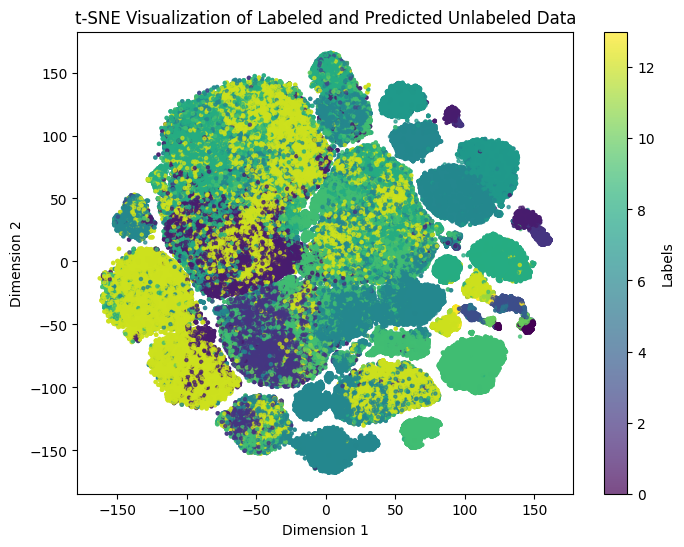

In [63]:
from openTSNE import TSNE
import matplotlib.pyplot as plt
import numpy as np

def plot_tsne_opentsne(features, labels, title="t-SNE Visualization"):
    """
    Generate t-SNE visualization using OpenTSNE for given features and labels.

    Parameters:
    - features: The feature matrix (e.g., encoded or raw features).
    - labels: Labels corresponding to the features.
    - title: Title of the plot.
    """
    # Perform t-SNE with OpenTSNE
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
    tsne_result = tsne.fit(features)

    # Plot the results
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis', s=5, alpha=0.7)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.colorbar(scatter, label='Labels')
    plt.show()

# Features (scaled unlabeled data) and predicted labels
scaled_features = np.vstack([x_train_scaled_encoded, x_unlabeled_scaled])  # Combine labeled and unlabeled features
combined_labels = np.hstack([y_train, y_unlab_pred])  # Combine true and predicted labels

# Call the t-SNE plotting function
plot_tsne_opentsne(scaled_features, combined_labels, title="t-SNE Visualization of Labeled and Predicted Unlabeled Data")


In [64]:
def generate_unlabeled_predictions(x_unlab, encoder, predictor):
  x_unlab_encoded = encoder.predict(x_unlab)
  _, y_unlab_hat = predictor(x_unlab_encoded, training=False)
  y_unlab_pred = np.argmax(y_unlab_hat, axis=1)
  return y_unlab_pred
'''
performance metric -> generate unlabeled predictions -> inout prediction labels for the unlabeled part of the dataset
generate tsne for this new dataset
'''

'\nperformance metric -> generate unlabeled predictions -> inout prediction labels for the unlabeled part of the dataset\ngenerate tsne for this new dataset\n'

In [1]:
pip install gradio

In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
from openTSNE import TSNE
import matplotlib.pyplot as plt
from matplotlib import colormaps
from tensorflow.keras.models import load_model

# Function to generate predictions for unlabeled data
def generate_predictions_for_unlabeled(x_unlab, encoder, predictor):
    """Encode data and generate predictions for unlabeled samples."""
    encoded_data = encoder.predict(x_unlab)  # Encode data using the encoder
    predictions = predictor(encoded_data, training=False)  # Get the predictions
    predicted_classes = np.argmax(predictions, axis=1)  # Get predicted class labels
    return predicted_classes


# Function for t-SNE visualization
def create_tsne_visualization(features, labels, title="t-SNE Visualization"):
    """Perform t-SNE dimensionality reduction and visualize with distinct cluster colors."""
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
    tsne_result = tsne.fit(features)

    unique_labels = np.unique(labels)
    label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
    color_indices = np.array([label_to_index[label] for label in labels])

    cmap = colormaps.get_cmap('tab10')  # Get the colormap
    fig, ax = plt.subplots(figsize=(8, 6))
    scatter = ax.scatter(
        tsne_result[:, 0],
        tsne_result[:, 1],
        c=color_indices,
        cmap=cmap,
        s=5,
        alpha=0.7
    )
    ax.set_title(title)
    ax.set_xlabel('t-SNE Dimension 1')
    ax.set_ylabel('t-SNE Dimension 2')

    # Add legend for cluster labels
    legend_handles = [
        plt.Line2D([], [], marker='o', color=cmap(idx / len(unique_labels)), linestyle='', markersize=10)
        for idx in range(len(unique_labels))
    ]
    ax.legend(legend_handles, unique_labels, title="Clusters", loc="best", bbox_to_anchor=(1, 1))

    return fig

# Function to process and visualize predictions and t-SNE
def process_and_visualize_data(start_row, end_row):
    """
    Process a subset of the x_unlabeled dataset, predict labels, and generate a t-SNE visualization.
    """
    global x_unlabeled  # Ensure x_unlabeled is loaded

    # Parse input row indices
    start_row = int(start_row)
    end_row = int(end_row)

    # Select subset of data
    x_subset = x_unlabeled[start_row:end_row]

    # Load pre-trained encoder and predictor
    encoder = load_model(encoder_path)
    trained_model = encoder
    predictor = trained_model  # Assume predictor is preloaded

    # Predict labels for the subset
    predicted_labels = generate_predictions_for_unlabeled(x_subset, encoder, predictor)

    # Create t-SNE visualization
    tsne_figure = create_tsne_visualization(x_subset, predicted_labels, title="t-SNE Visualization of Subset")

    # Return visualization and predictions
    return tsne_figure, pd.DataFrame({"Predicted Labels": predicted_labels}).head(10)

# Set up Gradio interface
inputs = [
    gr.Number(label="Start Row", value=3, precision=0),  # Starting row input
    gr.Number(label="End Row", value=109, precision=0)   # Ending row input
]

outputs = [
    gr.Plot(label="t-SNE Visualization"),               # t-SNE plot
    gr.Dataframe(label="Predicted Labels (Top 10)")     # Dataframe for predicted labels
]

gr.Interface(
    fn=process_and_visualize_data,
    inputs=inputs,
    outputs=outputs,
    title="Self-Supervised Learning Visualization",
    description="Generate predictions and visualize data with t-SNE."
).launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://2b1b2770eb602cb361.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 624, in process_events
    response = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 323, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 2016, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1563, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 8